# Block construction agent plots from experiment runner dataframe

## Imports and worlds

In [2]:
import blockworld as bw
import blockworld_library as bl

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [5]:
class State():
    """A dummy state to pass to blockworld scoring functions"""
    def __init__(self,world,blockmap):
        self.block_map = blockmap
        self.world = world

In [6]:
#initializing worlds (used for scoring re a certain silhuoette)
silhouettes = {i : bl.load_interesting_structure(i) for i in [14,15,5,8,12,1]}
worlds_silhouettes = {'int_struct_'+str(i) : bw.Blockworld(silhouette=s,block_library=bl.bl_silhouette2_default) for i,s in silhouettes.items()}
worlds_small = {
    'stonehenge_6_4' : bw.Blockworld(silhouette=bl.stonehenge_6_4,block_library=bl.bl_stonehenge_6_4),
    'stonehenge_3_3' : bw.Blockworld(silhouette=bl.stonehenge_3_3,block_library=bl.bl_stonehenge_3_3),
    'block' : bw.Blockworld(silhouette=bl.block,block_library=bl.bl_stonehenge_3_3),
    'T' : bw.Blockworld(silhouette=bl.T,block_library=bl.bl_stonehenge_6_4),
    'side_by_side' : bw.Blockworld(silhouette=bl.side_by_side,block_library=bl.bl_stonehenge_6_4),
}
bw_worlds = {**worlds_silhouettes,**worlds_small}

Silhouette dimensions (8, 8) don't match world dimensions. Setting world dimensions to match.
Silhouette dimensions (8, 8) don't match world dimensions. Setting world dimensions to match.
Silhouette dimensions (8, 8) don't match world dimensions. Setting world dimensions to match.
Silhouette dimensions (8, 8) don't match world dimensions. Setting world dimensions to match.
Silhouette dimensions (8, 8) don't match world dimensions. Setting world dimensions to match.
Silhouette dimensions (8, 8) don't match world dimensions. Setting world dimensions to match.
Silhouette dimensions (6, 4) don't match world dimensions. Setting world dimensions to match.
Silhouette dimensions (3, 3) don't match world dimensions. Setting world dimensions to match.
Silhouette dimensions (4, 4) don't match world dimensions. Setting world dimensions to match.
Silhouette dimensions (4, 4) don't match world dimensions. Setting world dimensions to match.
Silhouette dimensions (4, 9) don't match world dimensions. S

Let's read the dataframes:

In [8]:
dfs = ['../breadth_to_3.pkl',
       '../breadth_4.pkl',
       '../MCTS.pkl']

This expects the .pkls in `projection_block_construction`

In [8]:
dfs = ['breadth_to_4_sum.pkl']

In [9]:
#load all experiments as one dataframe
df = pd.concat([pd.read_pickle(l) for l in dfs])

In [10]:
display(df)

agent  \
0     type: BFS_Agent scoring: random_scoring horizo...   
1     type: BFS_Agent scoring: random_scoring horizo...   
2     type: BFS_Agent scoring: random_scoring horizo...   
3     type: BFS_Agent scoring: random_scoring horizo...   
4     type: BFS_Agent scoring: random_scoring horizo...   
...                                                 ...   
2195  type: BFS_Agent scoring: silhouette_hole_score...   
2196  type: BFS_Agent scoring: silhouette_hole_score...   
2197  type: BFS_Agent scoring: silhouette_hole_score...   
2198  type: BFS_Agent scoring: silhouette_hole_score...   
2199  type: BFS_Agent scoring: silhouette_hole_score...   

                                                  world outcome  \
0     int_struct_14|Type: Blockworld dimension: (8, ...    Fail   
1     int_struct_15|Type: Blockworld dimension: (8, ...    Fail   
2     int_struct_5|Type: Blockworld dimension: (8, 8...    Fail   
3     int_struct_8|Type: Blockworld dimension: (8, 8...    Fail   
4     int_struct_12|Type: Blockworld dimension: (8, ...    Fail   
...                                                 ...     ...   
2195  stonehenge_6_4|Type: Blockworld dimension: (6,...     Win   
2196  stonehenge_3_3|Type: Blockworld dimension: (3,...     Win   
2197  block|Type: Blockworld dimension: (4, 4) silho...     Win   
2198  T|Type: Blockworld dimension: (4, 4) silhouett...    Fail   
2199  side_by_side|Type: Blockworld dimension: (4, 9...     Win   

                                                    run  
0                                                  b...  
1                                                  b...  
2                                                  b...  
3                                                  b...  
4                                                  b...  
...                                                 ...  
2195                                               b...  
2196                                 blockmap  \
0  ...  
2197                                               b...  
2198                                               b...  
2199                                               b...  

[2200 rows x 4 columns]

In [117]:
r = df.iloc[1]['run']

In [120]:
r

blockmap  \
0   [[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0,...   
1   [[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0,...   
2   [[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0,...   
3   [[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 3, 3, 0,...   
4                                                 NaN   
..                                                ...   
56                                                NaN   
57                                                NaN   
58                                                NaN   
59                                                NaN   
60                                                NaN   

                                               blocks stability  F1 score  \
0                                                [[]]      True         0   
1     [[<blockworld.Block object at 0x7fc2a99689d0>]]      True      0.32   
2   [[<blockworld.Block object at 0x7fc2a99689d0>,...      True  0.444444   
3   [[<blockworld.Block object at 0x7fc2a99689d0>,...      True       0.5   
4                                                 NaN       NaN       NaN   
..                                                ...       ...       ...   
56                                                NaN       NaN       NaN   
57                                                NaN       NaN       NaN   
58                                                NaN       NaN       NaN   
59                                                NaN       NaN       NaN   
60                                                NaN       NaN       NaN   

   chosen action final result final result reason  
0   [[(2x4), 3]]      Ongoing                None  
1   [[(2x2), 2]]      Ongoing                None  
2   [[(2x1), 3]]      Ongoing                None  
3            NaN         Fail               Holes  
4            NaN          NaN                 NaN  
..           ...          ...                 ...  
56           NaN          NaN                 NaN  
57           NaN          NaN                 NaN  
58           NaN          NaN                 NaN  
59           NaN          NaN                 NaN  
60           NaN          NaN                 NaN  

[61 rows x 7 columns]

In [128]:
r[r['final result'] == r['final result']].iloc[-1]['final result']

'Fail'

In [ ]:
#CAREFUL
#view entire dataframe
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)

In [11]:
agents = df['agent'].unique()

In [12]:
worlds = df['world'].unique()
worlds_index = list(set([w.split('|')[0] for w in worlds]))

In [13]:
#🐘
elephant = 'int_struct_15'
stonehenge = 'stonehenge_6_4'

In [14]:
agents

array(['type: BFS_Agent scoring: random_scoring horizon: 1 scoring: Sum sparse?: False',
       'type: BFS_Agent scoring: silhouette_hole_score horizon: 1 scoring: Sum sparse?: False'],
      dtype=object)

In [17]:
worlds

array(['int_struct_14|Type: Blockworld dimension: (8, 8) silhouette: 6095153969955208207',
       'int_struct_15|Type: Blockworld dimension: (8, 8) silhouette: -2728101016113241501',
       'int_struct_5|Type: Blockworld dimension: (8, 8) silhouette: -4681024938474979787',
       'int_struct_8|Type: Blockworld dimension: (8, 8) silhouette: 4312494139581831693',
       'int_struct_12|Type: Blockworld dimension: (8, 8) silhouette: -3930831957242550315',
       'int_struct_1|Type: Blockworld dimension: (8, 8) silhouette: -1224246988597226977',
       'stonehenge_6_4|Type: Blockworld dimension: (6, 4) silhouette: -6028741216852574640',
       'stonehenge_3_3|Type: Blockworld dimension: (3, 3) silhouette: 4667092404785101159',
       'block|Type: Blockworld dimension: (4, 4) silhouette: 7490019714977754189',
       'T|Type: Blockworld dimension: (4, 4) silhouette: 5235214197742391821',
       'side_by_side|Type: Blockworld dimension: (4, 9) silhouette: 5701687423912200627'],
      dtype=obj

In [18]:
worlds_index

['stonehenge_6_4',
 'block',
 'T',
 'int_struct_8',
 'stonehenge_3_3',
 'int_struct_1',
 'int_struct_12',
 'int_struct_15',
 'int_struct_14',
 'int_struct_5',
 'side_by_side']

## Helper functions

Let's look at success rate for every agent:

In [20]:
def get_final_status(run):
    """Takes run as input and returns a touple of final state and reason for failure.
    None if it hasn't failed."""
    #NaN == NaN returns false
    status = run[run['final result'] == run['final result']].iloc[-1]['final result']
    reason = run[run['final result'] == run['final result']].iloc[-1]['final result reason']
    return status, reason

In [21]:
def get_blockmaps(run):
    """Takes a run as input and returns the sequence of blockmaps.
    This produces one blockmap per action taken, even if the act function has only been called once
    (as MCTS does)."""
    blockmaps = []
    final_bm = run[run['final result'].notnull()]['blockmap'].iloc[-1] #grab final bm
    final_bm = np.array(final_bm)
    #generate sequence of blockmaps
    for i in range(np.max(final_bm)): #for every placed block
        bm = final_bm * (final_bm <= i+1)
        blockmaps.append(bm)
    return blockmaps

In [22]:
def get_BFS_runs(_sparses = ['False','True'],
                 _horizons = ['1','2','3','4','5'],
                 _scoring_functions=['random_scoring',
                            'silhouette_hole_score','silhouette_score','F1score'],
                 _scorings = ['Sum','Average','Random','Final state'],
                 _outcomes = ['Fail','Ongoing','Win'],
                 _reasons = None,
                 _world_indexes=None):
    """Returns all rows of the dataframe that fit the list of parameters. 
    Parameters must be passed as lists.
    All reasons are ['None','Full','Holes','Unstable']
    """
    rows = []
    if _world_indexes is None:
        _world_indexes = worlds_index
    for world_index in _world_indexes:
        dfw = df[df['world'].str.contains(world_index)] #get the lines of the corresponding world
        for horizon in _horizons:
            for scoring_function in _scoring_functions:
                for sparse in _sparses:
                    for scoring in _scorings:
                        filter = "type: BFS_Agent scoring: "+scoring_function+" horizon: "+horizon+" scoring: "+scoring +" sparse\?: "+sparse
                        dfwa = dfw[dfw['agent'].str.contains(filter)]
                        for outcome in _outcomes:
                            rows.append(dfwa[dfwa['outcome'] == outcome])
    dfc = pd.concat(rows)
    if _reasons is not None: #if we want to know the reason of failure
        reasons = [get_final_status(run)[1] for run in dfc['run']]
        filter = [True if reason in _reasons else False for reason in reasons]
        dfc = dfc[filter]
    return dfc

In [23]:
#NOT TESTED YET
def get_MCTS_runs(_budgets = ['10','100','1000','10000','100000'],
                 _outcomes = ['Fail','Ongoing','Win'],
                 _reasons = None,
                 _world_indexes=None):
    """Returns all rows of the dataframe that fit the list of parameters. 
    Parameters must be passed as lists.
    All reasons are ['None','Full','Holes','Unstable']
    """
    rows = []
    if _world_indexes is None:
        _world_indexes = worlds_index
    for world_index in _world_indexes:
        dfw = df[df['world'].str.contains(world_index)] #get the lines of the corresponding world
        for budget in _budgets:
            filter = "type: MCTS_Agent horizon: "+horizon+'\Z'
            dfwa = dfw[dfw['agent'].str.contains(filter)]
            for outcome in _outcomes:
                rows.append(dfwa[dfwa['outcome'] == outcome])
    dfc = pd.concat(rows)
    if _reasons is not None: #if we want to know the reason of failure
        reasons = [get_final_status(run)[1] for run in dfc['run']]
        filter = [True if reason in _reasons else False for reason in reasons]
        dfc = dfc[filter]
    return dfc

## Per agent

In [24]:
#wins over agent
#output can be pasted into numbers with space as seperator
for agent in agents:
    wins = 0
    total = 0
    for o in df[df['agent']==agent]['outcome']:
        if o == 'Win':
            wins+=1
        total += 1
    print(wins,'/',total,str(round(100*wins/total,2))+'%',agent)

116 / 1100 10.55% type: BFS_Agent scoring: random_scoring horizon: 1 scoring: Sum sparse?: False
435 / 1100 39.55% type: BFS_Agent scoring: silhouette_hole_score horizon: 1 scoring: Sum sparse?: False


In [351]:
#average number of steps per agent for failure and success
for agent in agents:
    win_lengths = []
    failure_lengths = []
    for i,row in df[df['agent']==agent].iterrows():
        num_steps = len(get_blockmaps(row['run'])) # get number of steps
        if row['outcome'] == 'Win':
            win_lengths.append(num_steps)
        if row['outcome'] == 'Fail':
            failure_lengths.append(num_steps)
    print(agent)
    print(len(win_lengths),"wins with avg length",sum(win_lengths)/len(win_lengths))
    print(len(failure_lengths),"wins with avg length",sum(failure_lengths)/len(failure_lengths))

type: BFS_Agent scoring: random_scoring horizon: 1 scoring: Sum sparse?: False
116 wins with avg length 5.137931034482759
984 wins with avg length 5.840447154471545
type: BFS_Agent scoring: silhouette_hole_score horizon: 1 scoring: Sum sparse?: False
435 wins with avg length 7.432183908045977
665 wins with avg length 10.093233082706767


In [142]:
#failure reasons per agent
for agent in agents:
    failure_reasons = {}
    for run in df[df['agent'] == agent]['run']:
        status, reason = get_final_status(run)
        if reason in failure_reasons.keys():
            failure_reasons[reason] += 1
        else:
            failure_reasons[reason] = 1
    print(agent,'\n',failure_reasons)

type: BFS_Agent scoring: random_scoring horizon: 1 scoring: Sum sparse?: False 
 {'Outside': 651, 'Holes': 233, 'None': 116, 'Full': 82, 'Unstable': 18}
type: BFS_Agent scoring: silhouette_hole_score horizon: 1 scoring: Sum sparse?: False 
 {'Outside': 603, 'Holes': 62, 'None': 435}


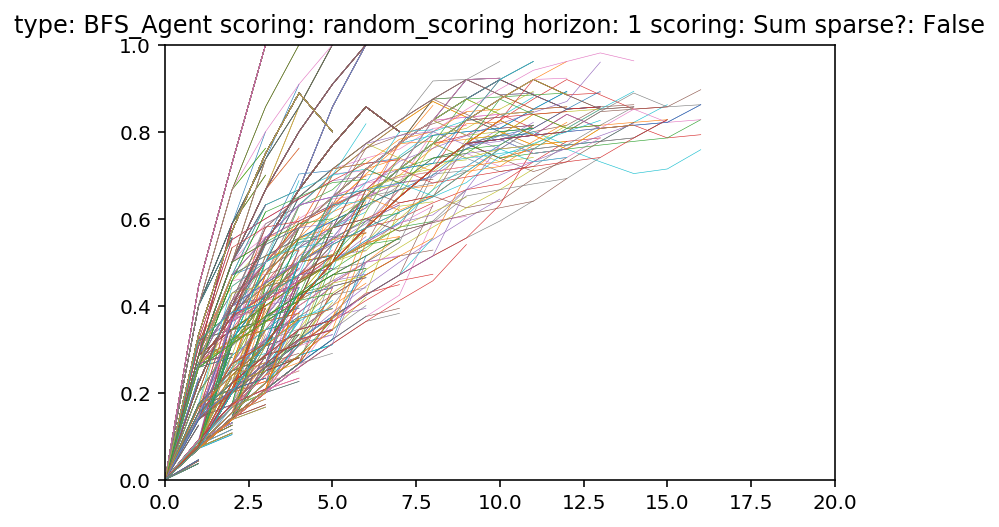

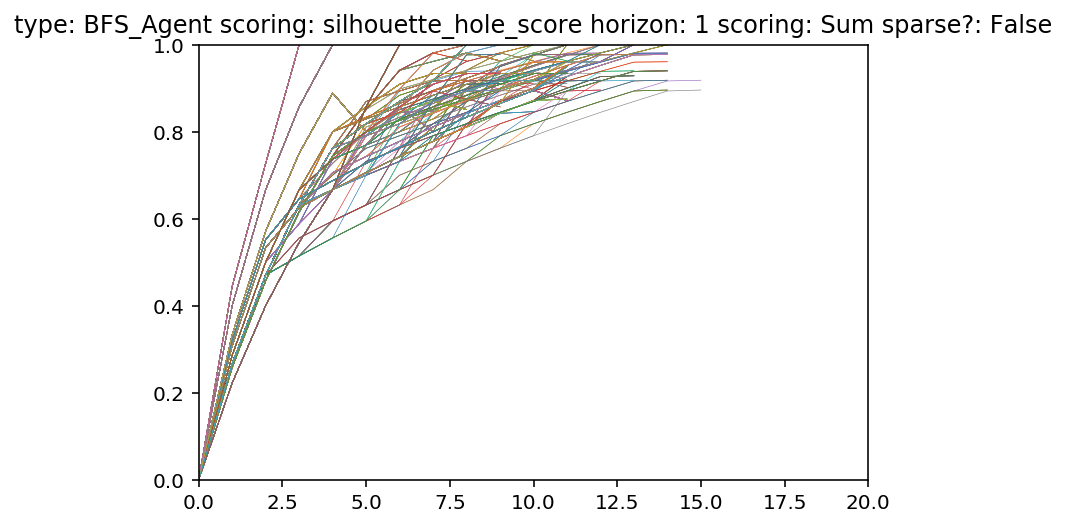

In [335]:
#plot F1 over time for agent
for agent in agents:
    plt.clf() #clear the plot
    for run in df[df['agent']==agent]['run']:
        plt.plot(run['F1 score'].to_list(),linewidth=0.3)
    plt.title(agent)
    plt.xlim([0,20])
    plt.ylim([0,1])
    plt.show()

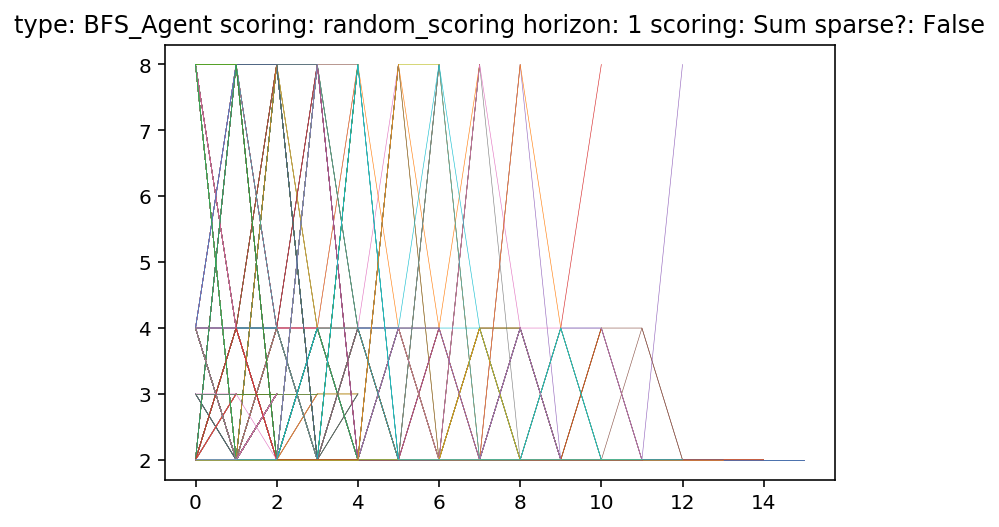

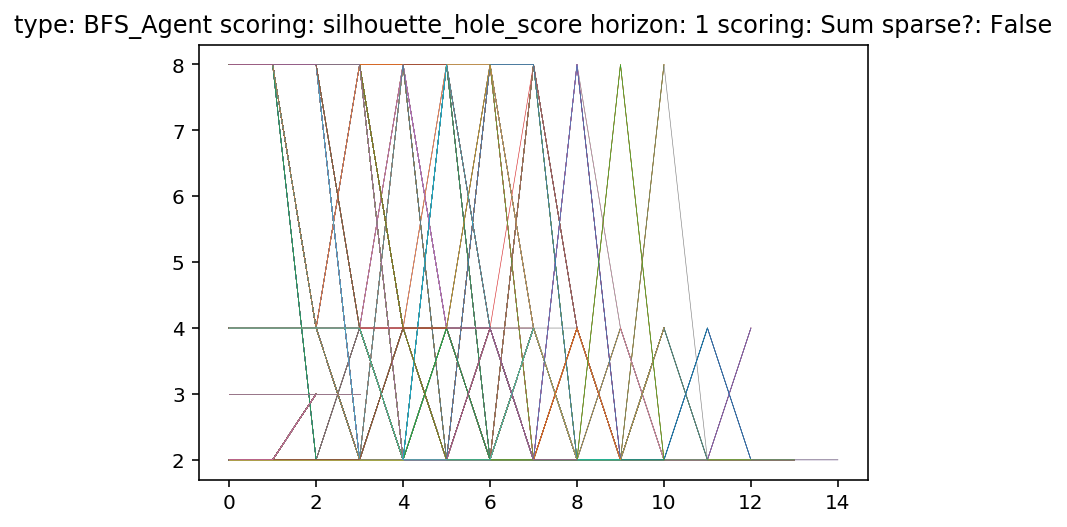

In [336]:
#plot blocksize over time for agent
for agent in agents:
    plt.clf() #clear the plot
    for run in df[df['agent']==agent]['run']:
        blocks_obj = run[run.notnull()['chosen action']]['chosen action'].to_list()
        size = [float(a)*float(b) for a,b in [b[0][0][1:-1].split('x') for b in blocks_obj]]
        plt.plot(size,linewidth=0.3)
    plt.title(agent)
    plt.show()

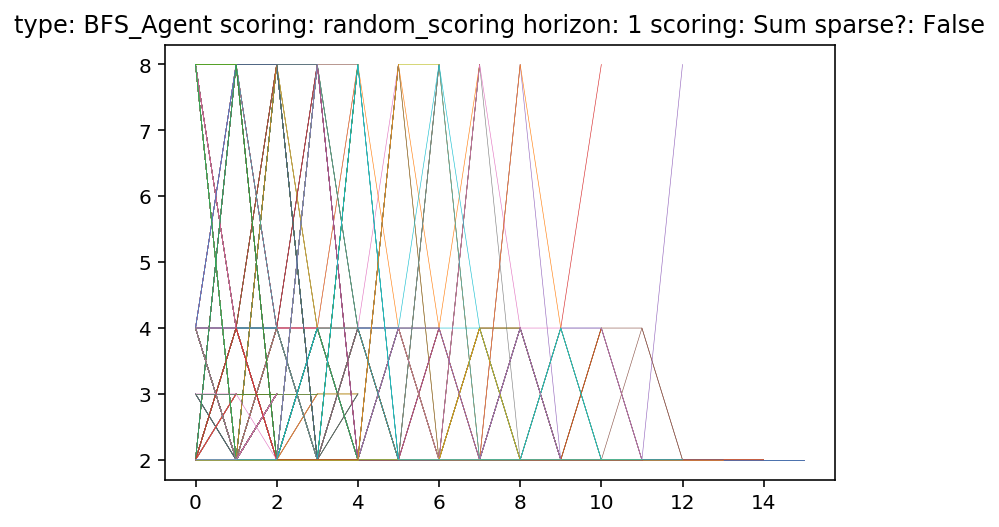

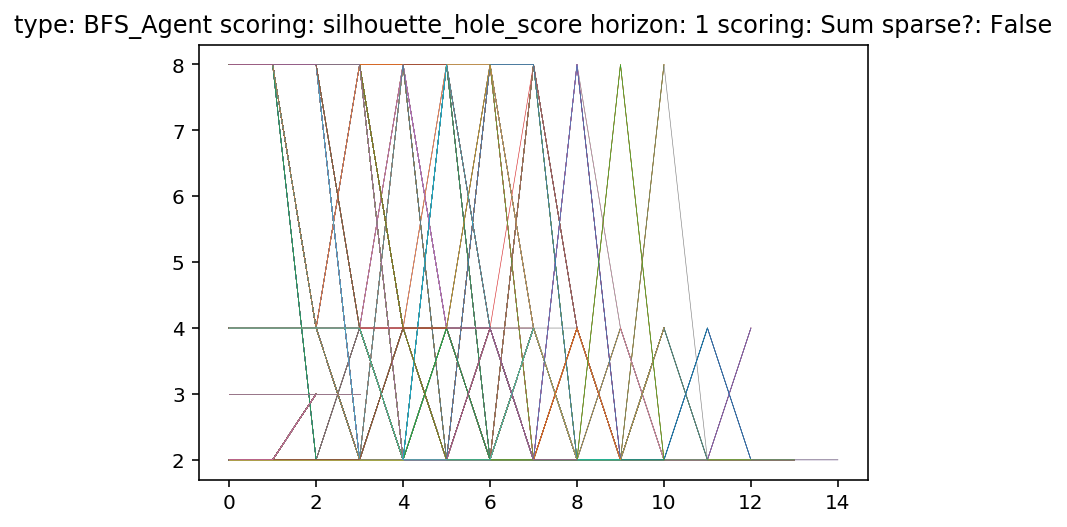

In [336]:
#plot avg blocksize over time for agent
for agent in agents:
    plt.clf() #clear the plot
    for run in df[df['agent']==agent]['run']:
        blocks_obj = run[run.notnull()['chosen action']]['chosen action'].to_list()
        size = [float(a)*float(b) for a,b in [b[0][0][1:-1].split('x') for b in blocks_obj]]
        plt.plot(size,linewidth=0.3)
    plt.title("Average blocksize for "+agent)
    plt.show()

## Per world
Makes more sense to selectively run worlds in the section further below.

In [25]:
#wins over world
for world in worlds_index:
    wins = 0
    total = 0
    for o in df[df['world'].str.contains(world)]['outcome']:
        if o == 'Win':
            wins+=1
        total += 1
    print(wins,'/',total,str(round(100*wins/total,2))+'%',world)

51 / 200 25.5% stonehenge_6_4
135 / 200 67.5% block
551 / 2200 25.05% T
63 / 200 31.5% int_struct_8
168 / 200 84.0% stonehenge_3_3
34 / 800 4.25% int_struct_1
0 / 200 0.0% int_struct_12
34 / 200 17.0% int_struct_15
0 / 200 0.0% int_struct_14
0 / 200 0.0% int_struct_5
100 / 200 50.0% side_by_side


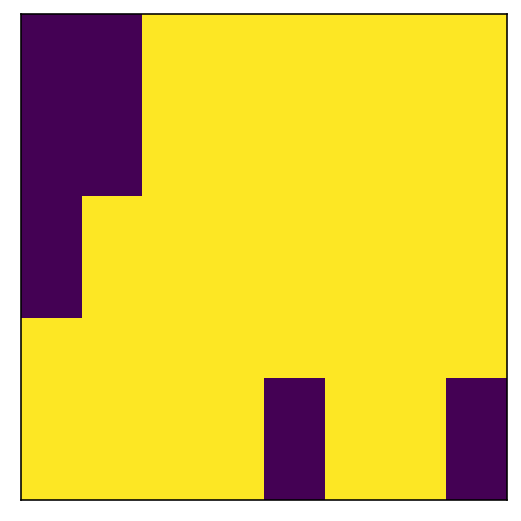

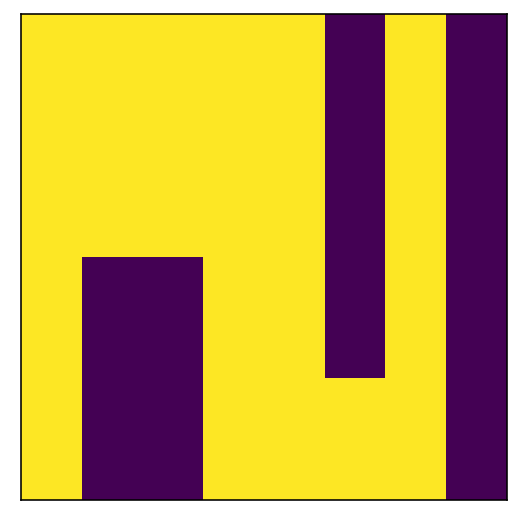

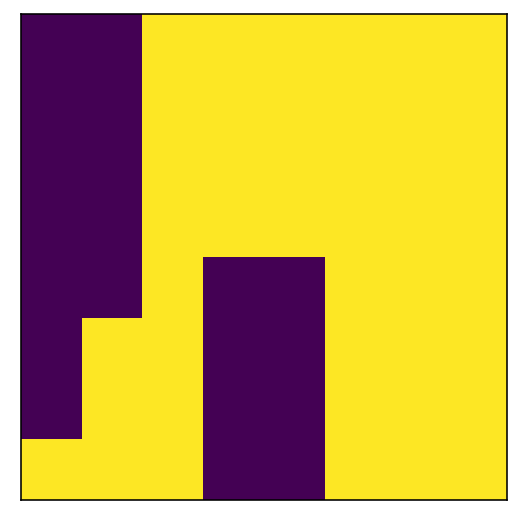

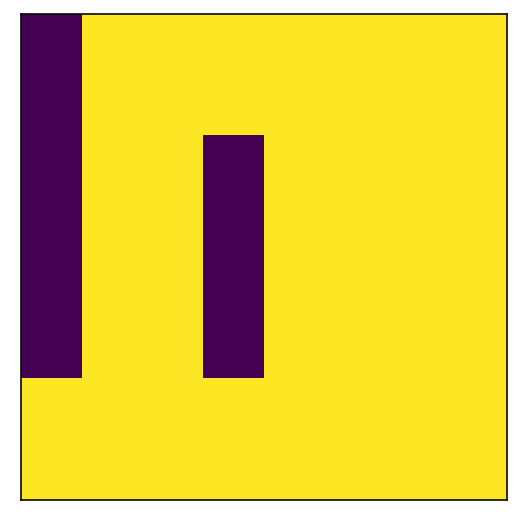

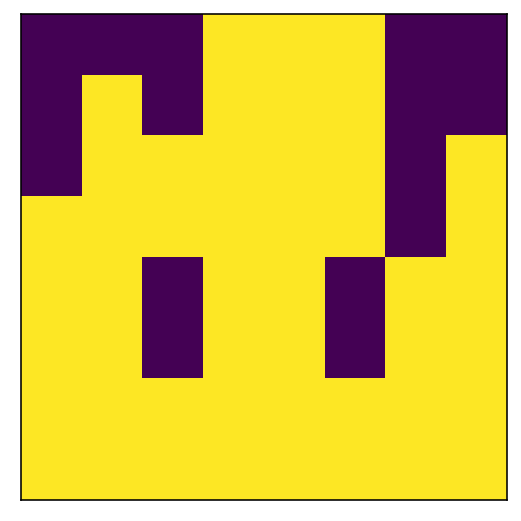

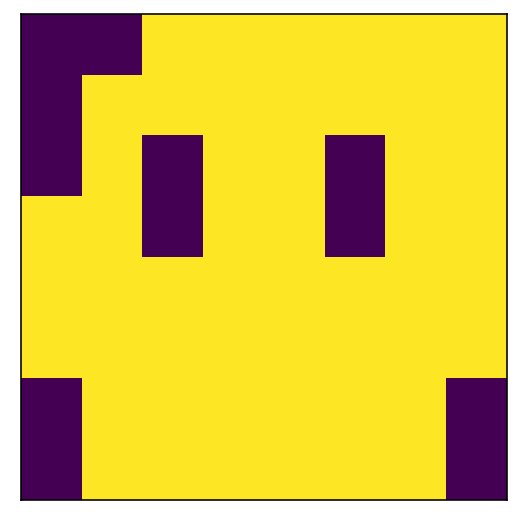

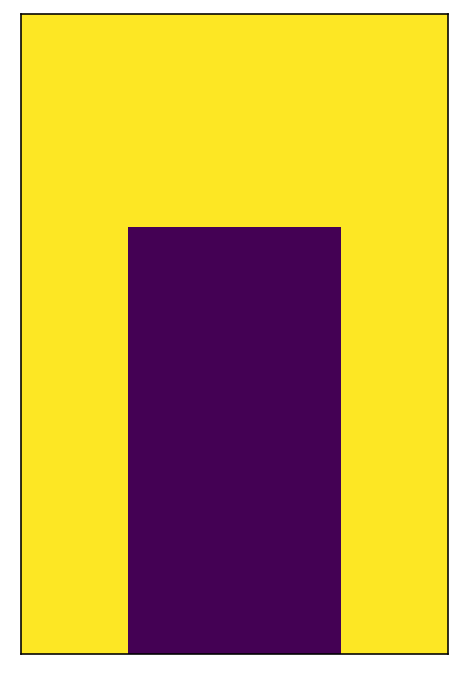

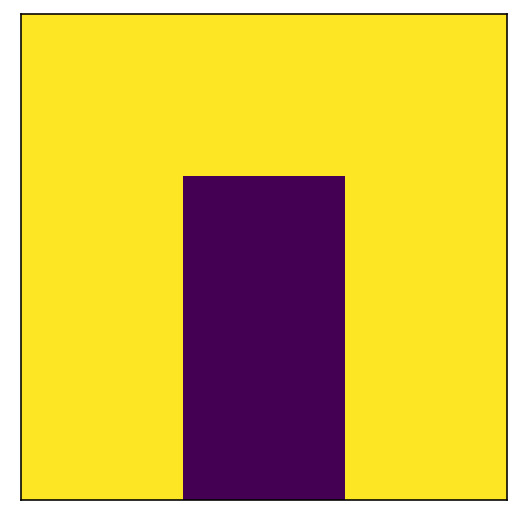

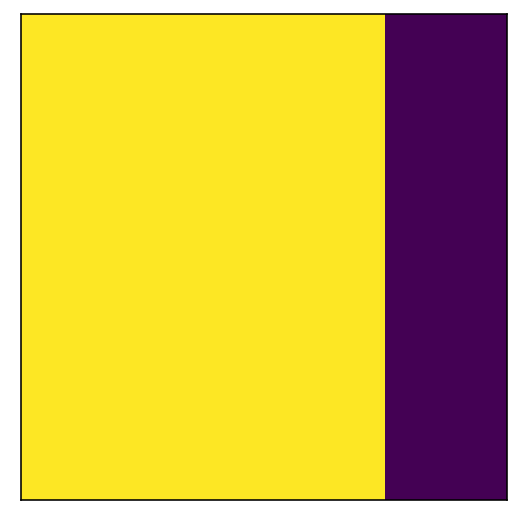

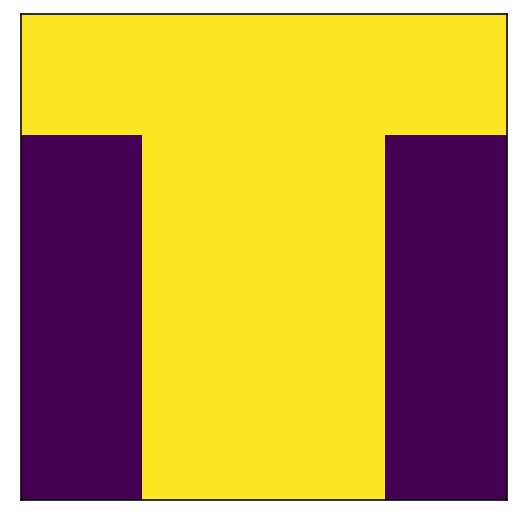

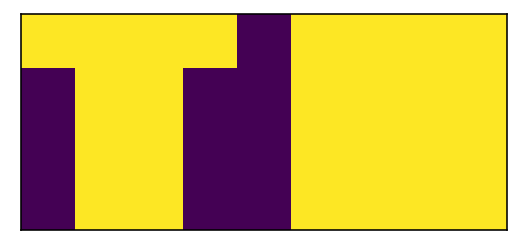

In [344]:
#images of worlds
for i,world in enumerate(bw_worlds.values()):
    plt.figure(figsize=(20,20))
    plt.subplot(3,4,i+1)
    plt.imshow(world.silhouette)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [ ]:
#CAUTION, lots of data
#plot all blockmaps
for agent in agents:
    plt.clf() #clear the plot
    for run in df[df['agent']==agent]['run']:
        bm_obj = run[run.notnull()['blockmap']]['blockmap'].tail(1)
        blockmap = np.array(bm_obj.to_list())[0,0,::] #convert object back to np and take the wrappers off
        plt.pcolormesh(blockmap[::-1], cmap='hot_r',vmin=0)
        plt.title(agent)
        plt.show()

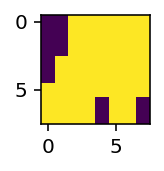

0 / 200 -> 0.0 %


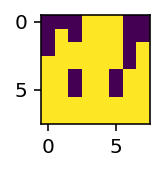

0 / 200 -> 0.0 %


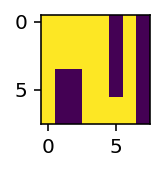

34 / 200 -> 17.0 %


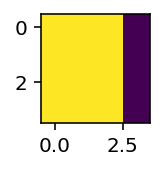

135 / 200 -> 67.5 %


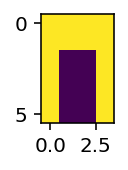

51 / 200 -> 25.5 %


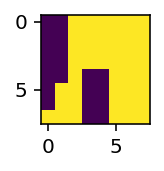

0 / 200 -> 0.0 %


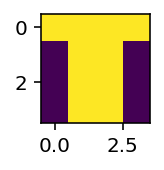

551 / 2200 -> 25.045454545454543 %


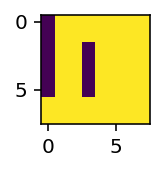

63 / 200 -> 31.5 %


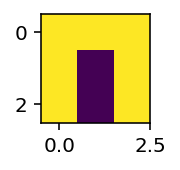

168 / 200 -> 84.0 %


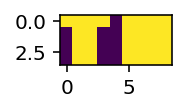

100 / 200 -> 50.0 %


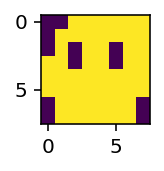

34 / 800 -> 4.25 %


In [93]:
#win ratio for world
for world in worlds_index:
    won = 0
    total = 0
    for index,outcome in df[(df['world'].str.contains(world))][['outcome']].iterrows():
        if outcome[0] == 'Win': won += 1
        total += 1
    plt.figure(figsize=(1,1))
    plt.imshow(bw_worlds[world.split('|')[0]].silhouette)
    plt.show()
    print(won,'/',total,'->',(won/total)*100,'%')


## Per world & agent
More in chosen world section

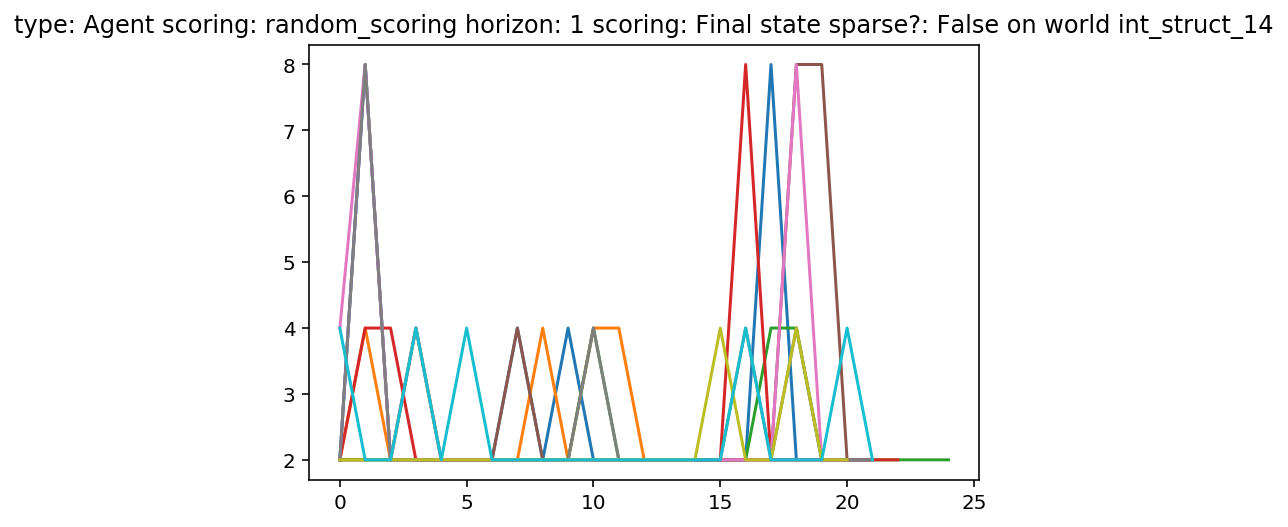

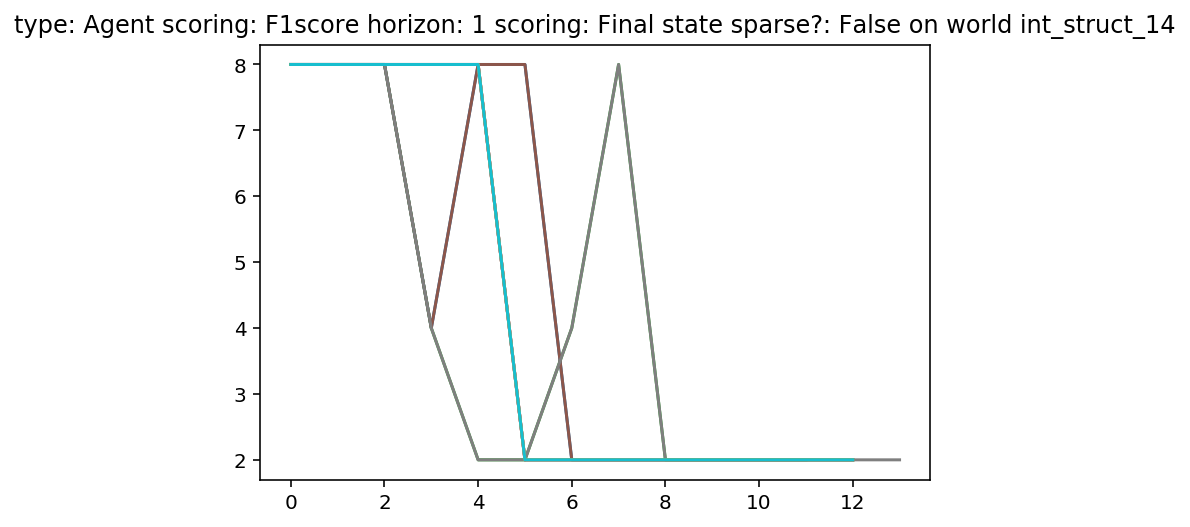

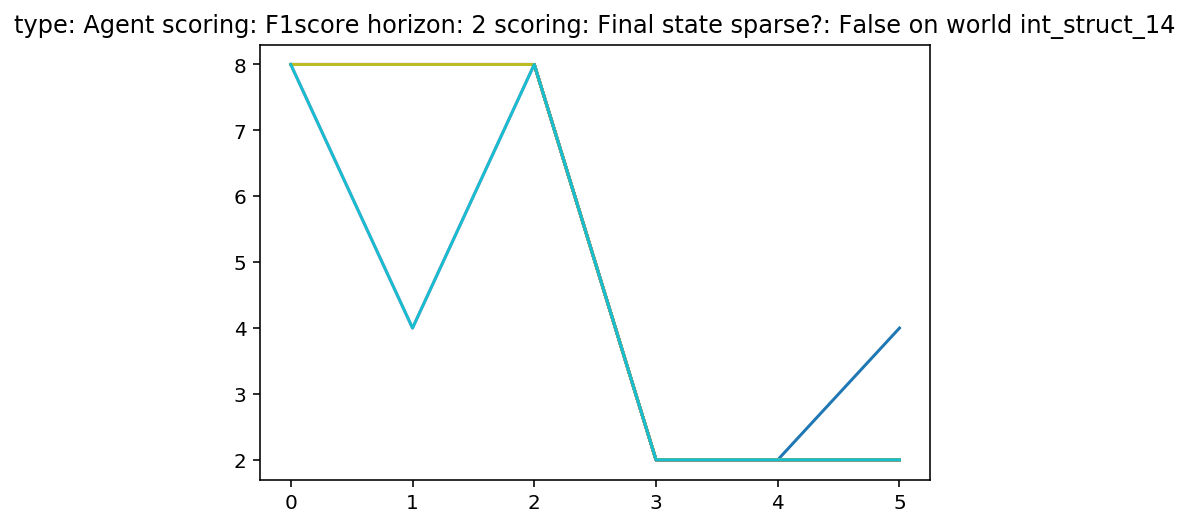

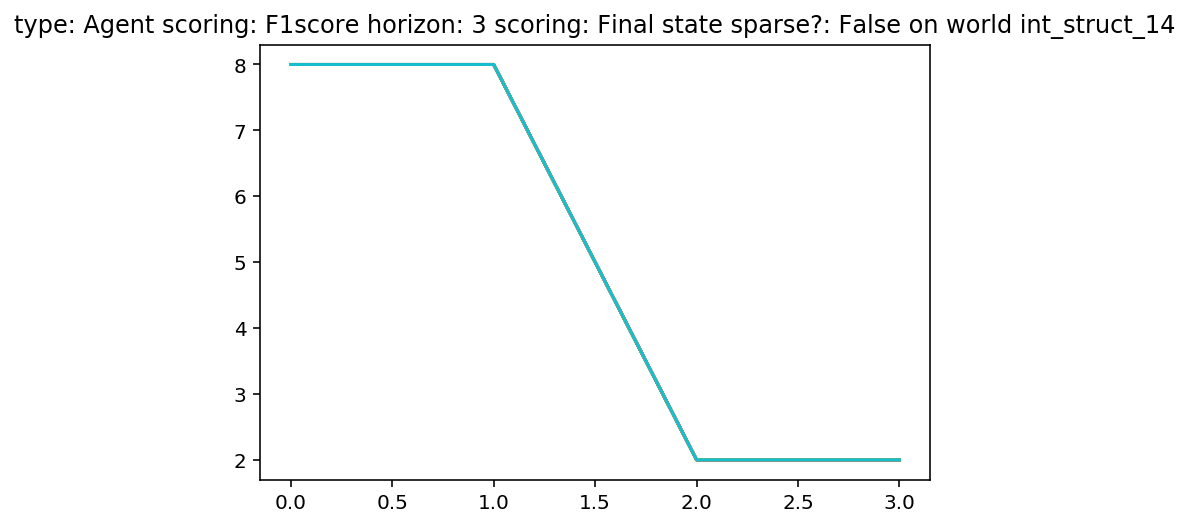

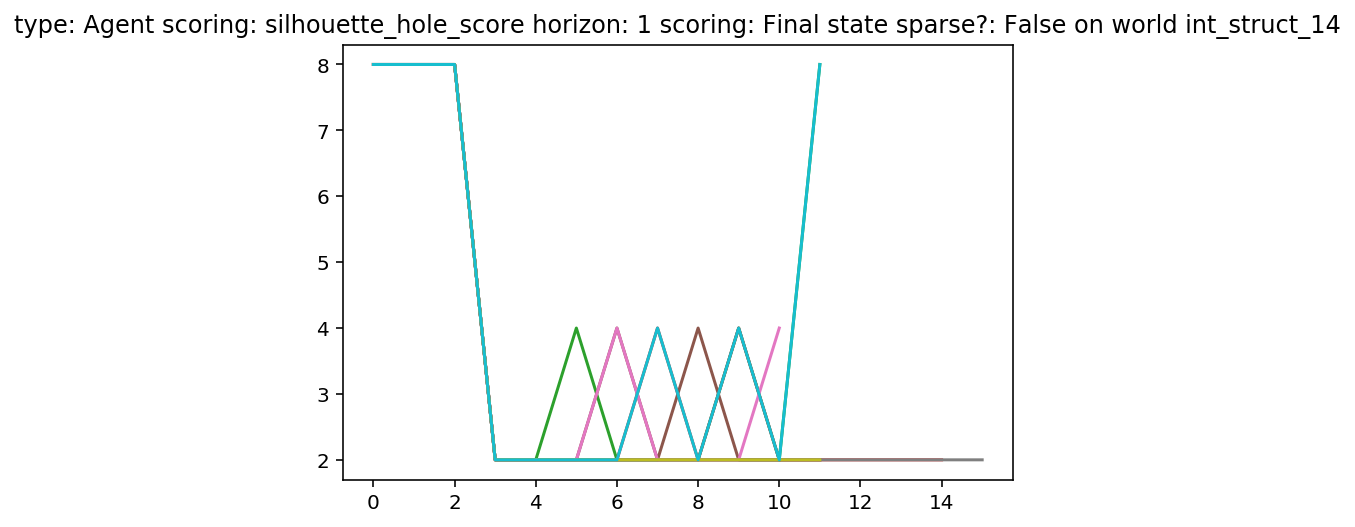

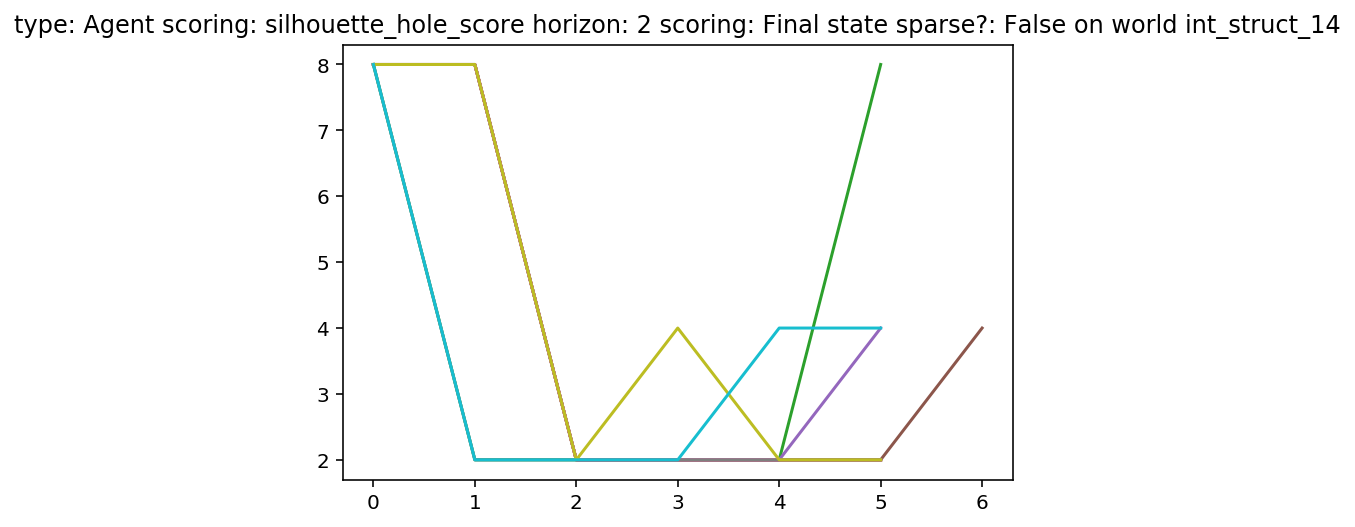

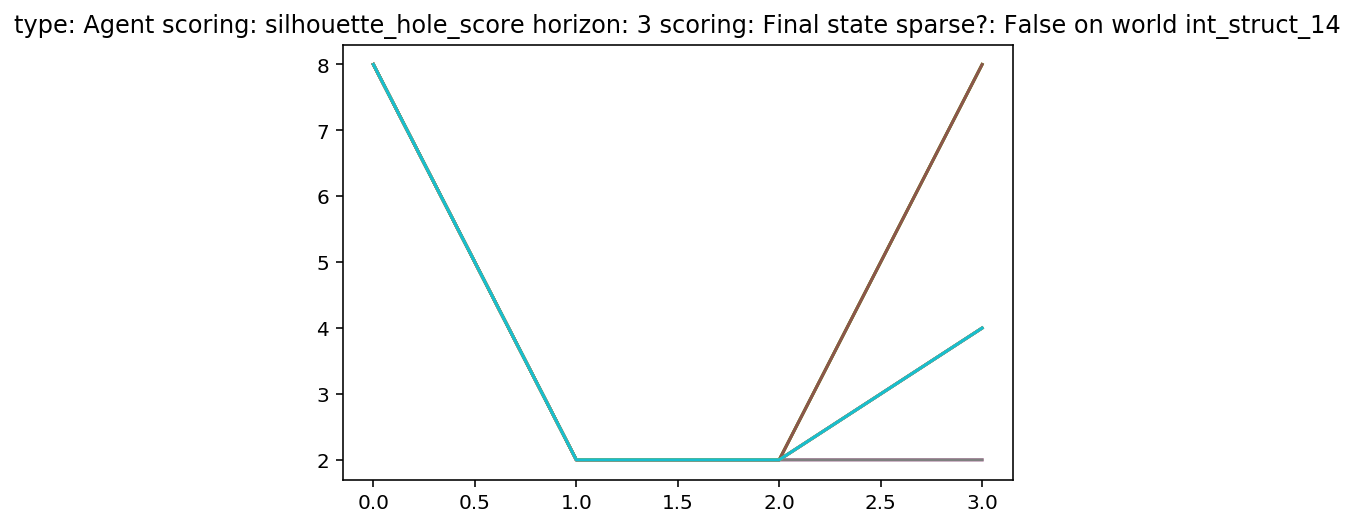

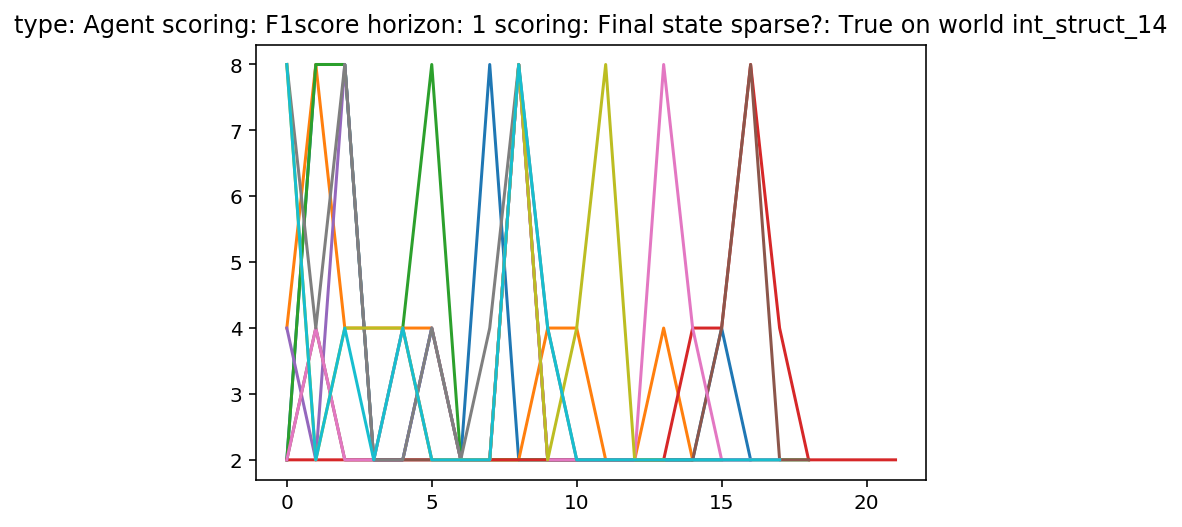

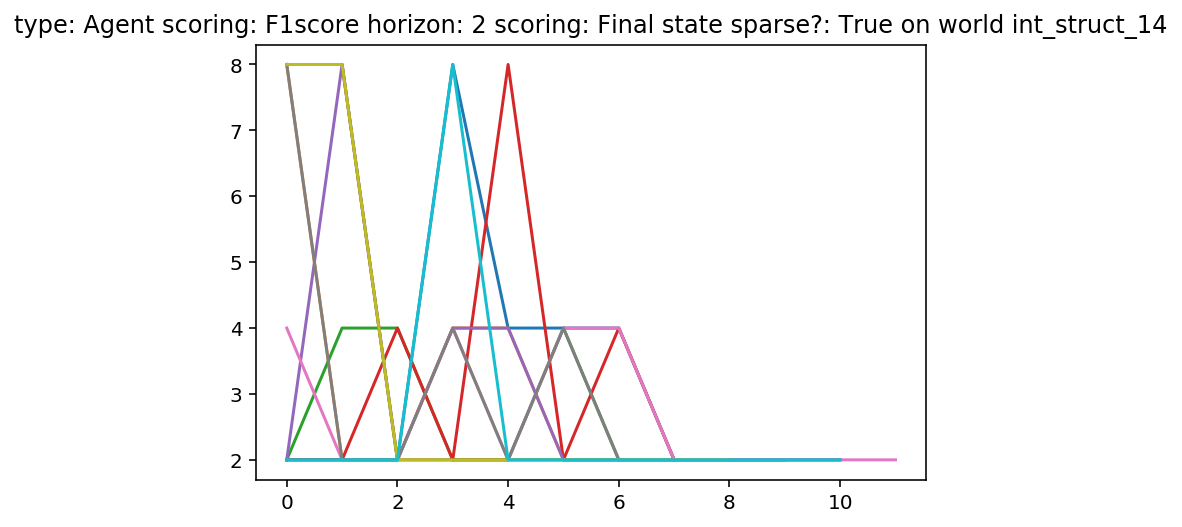

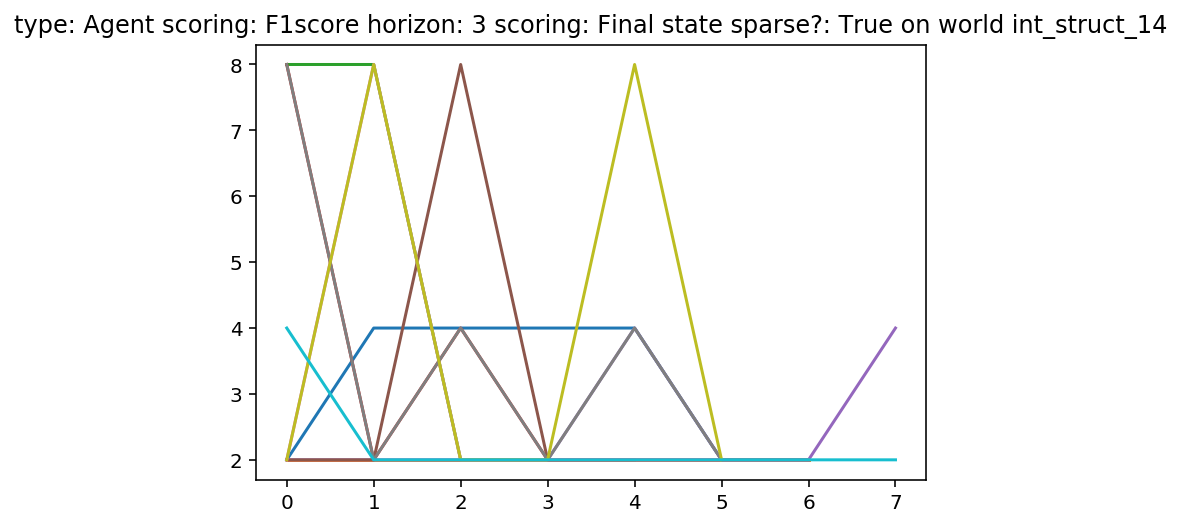

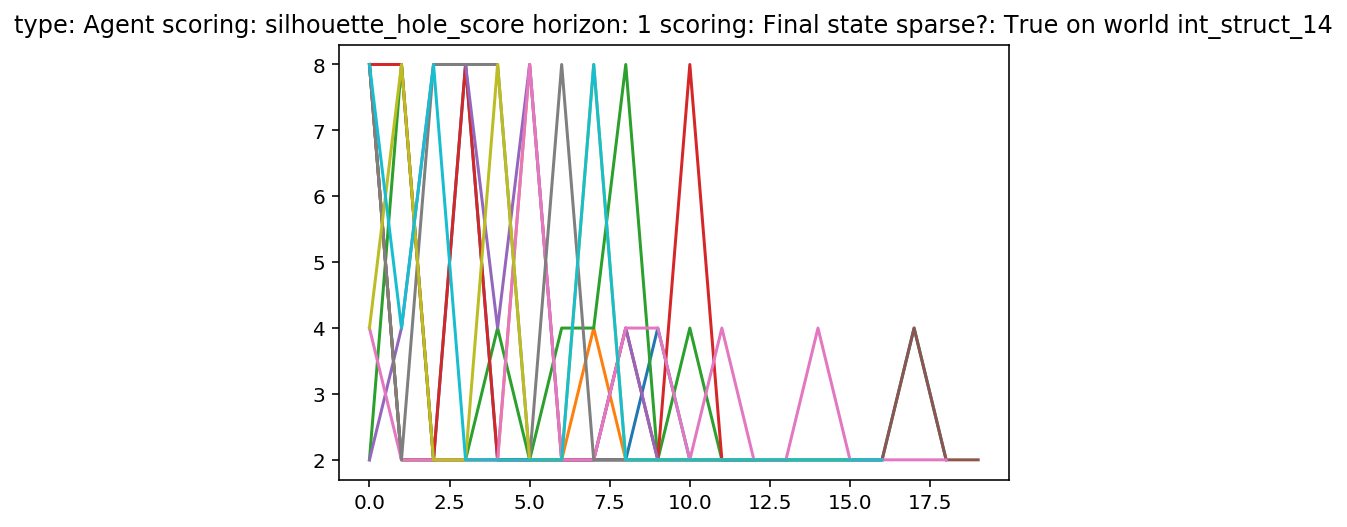

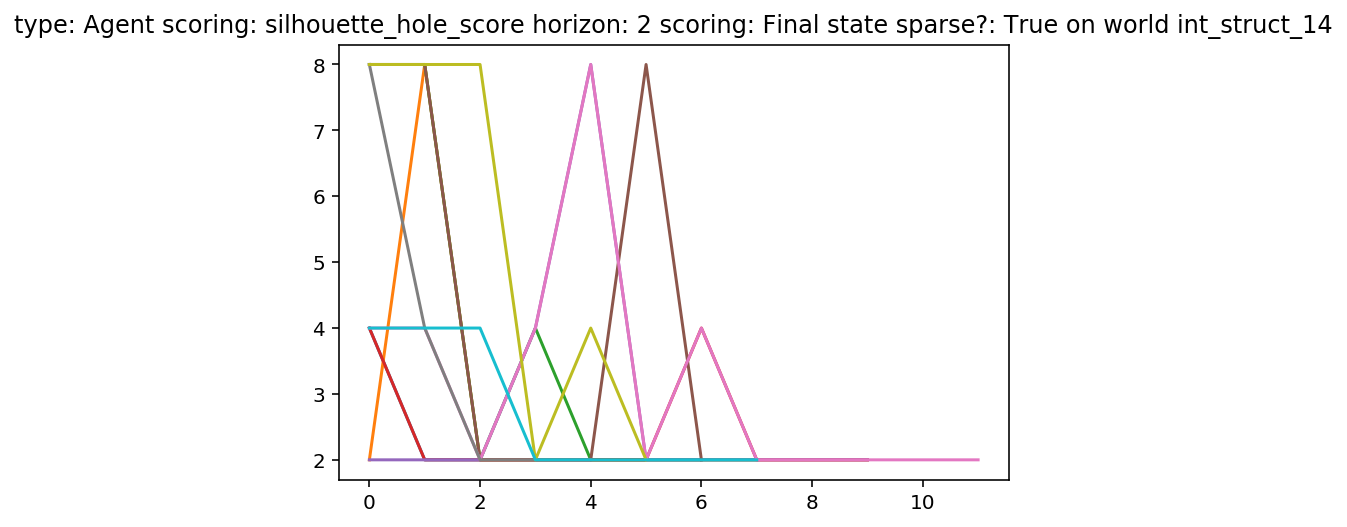

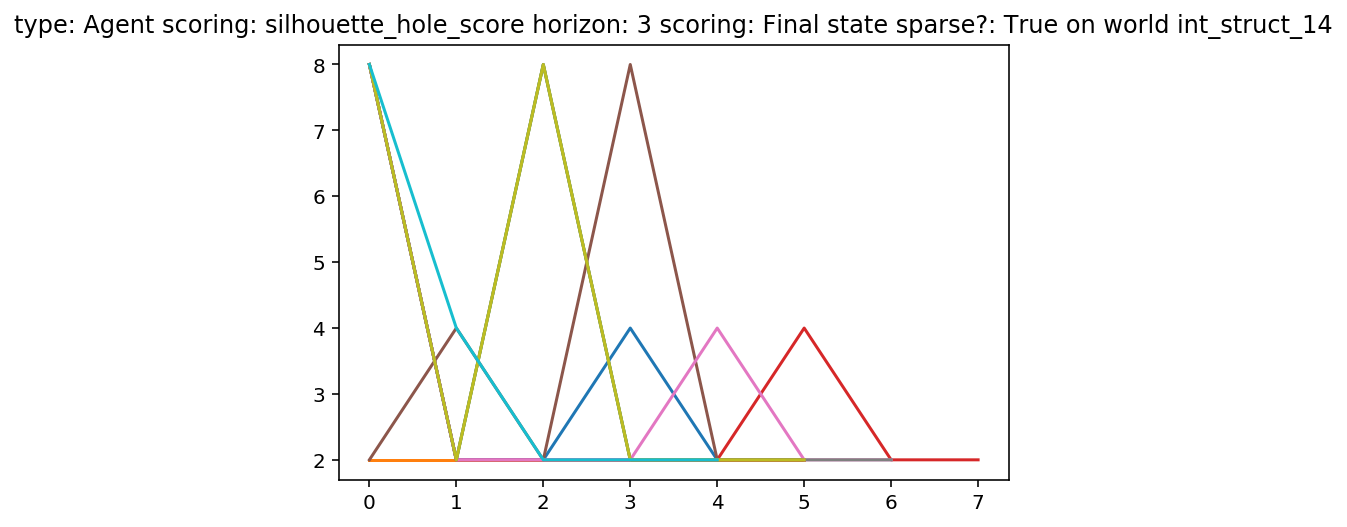

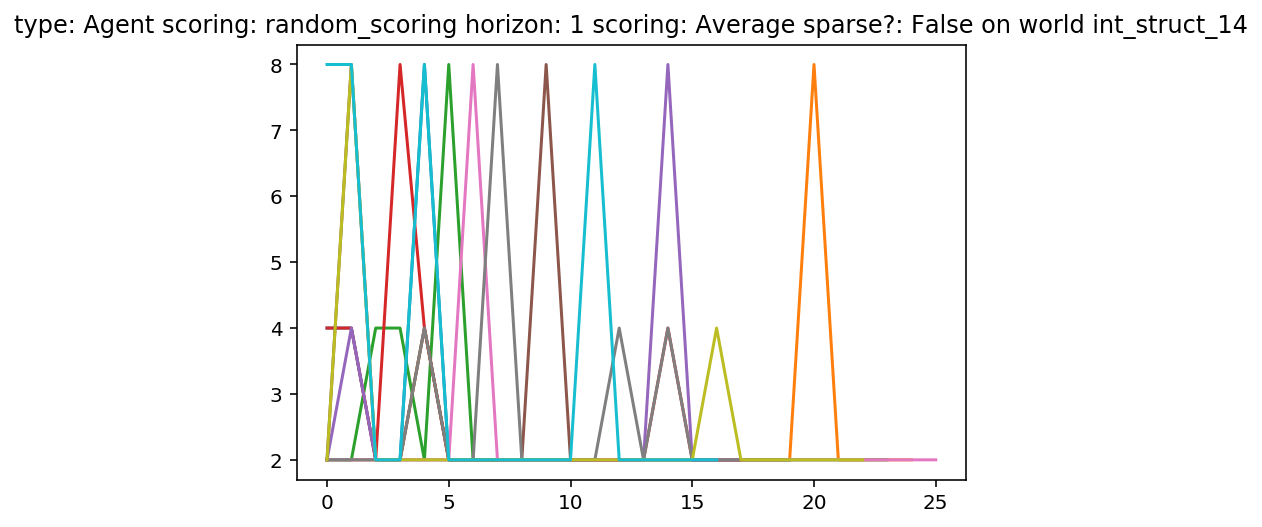

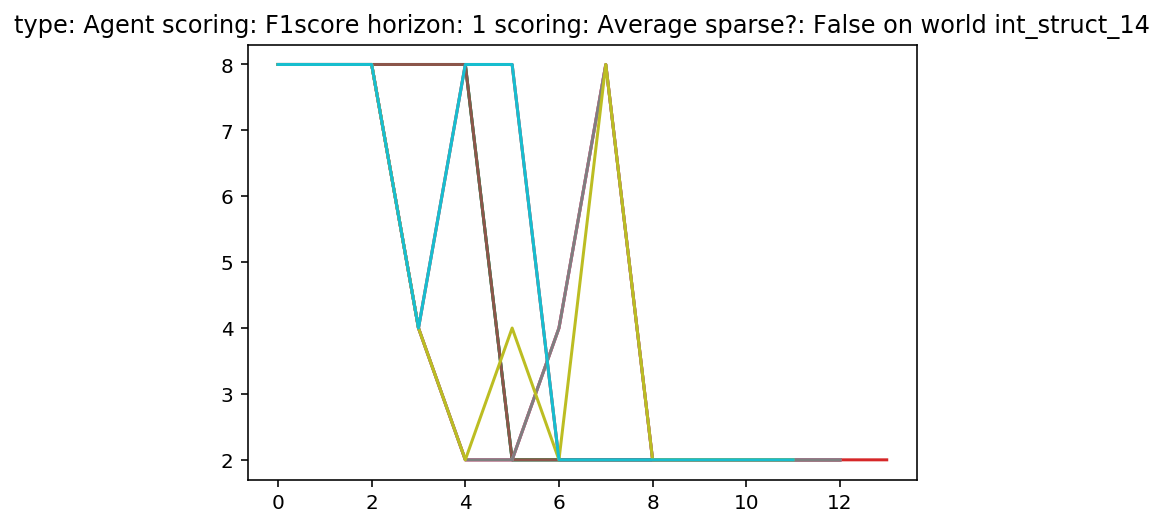

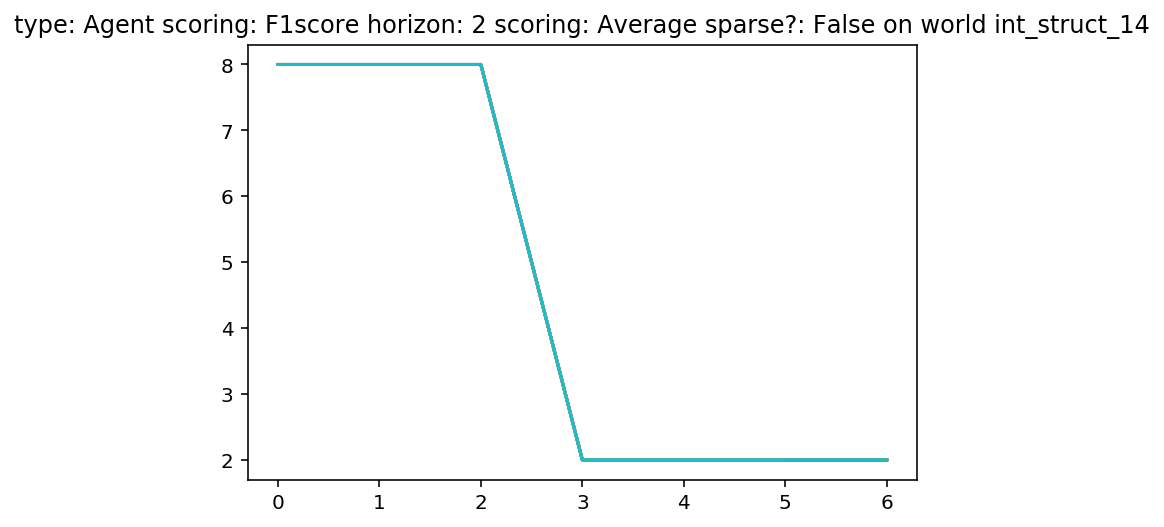

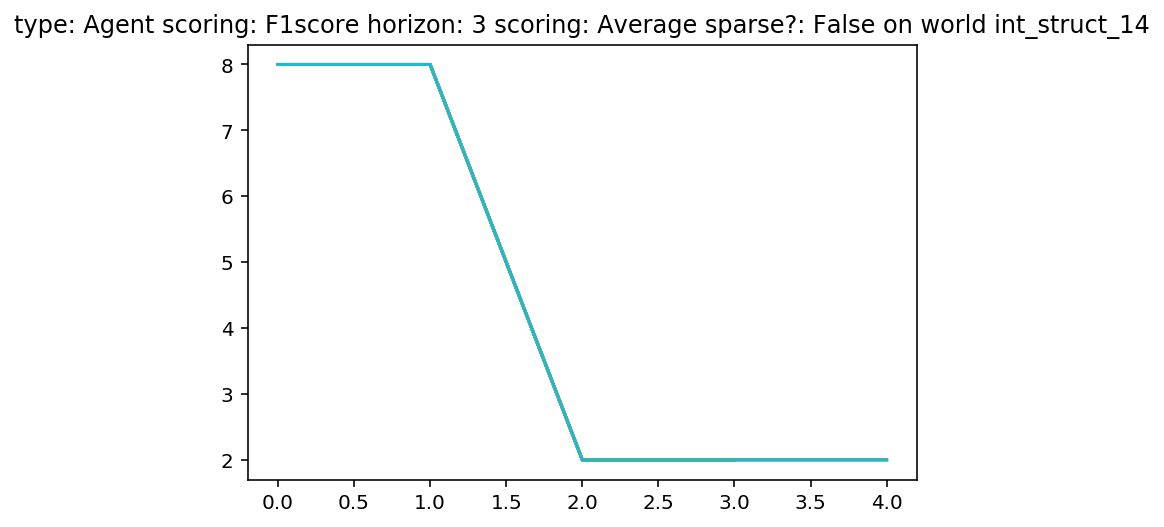

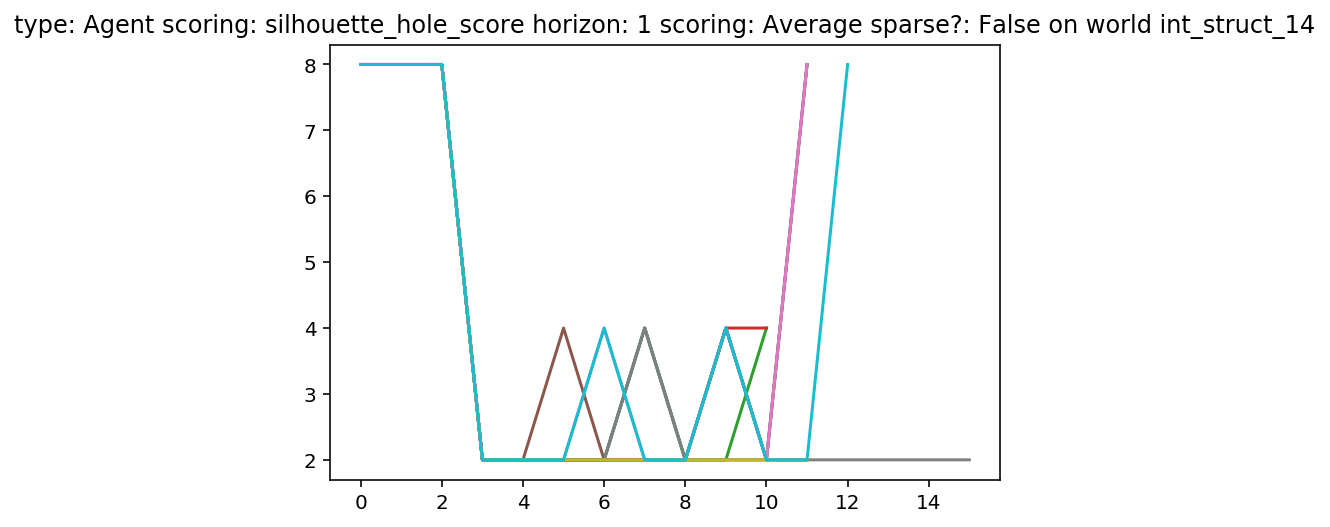

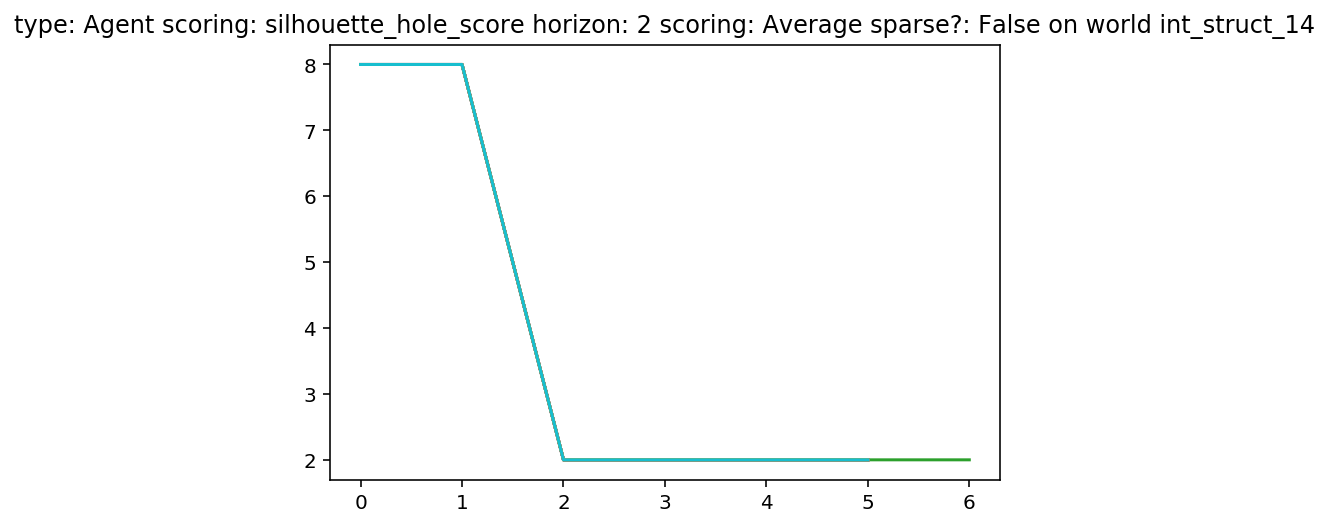

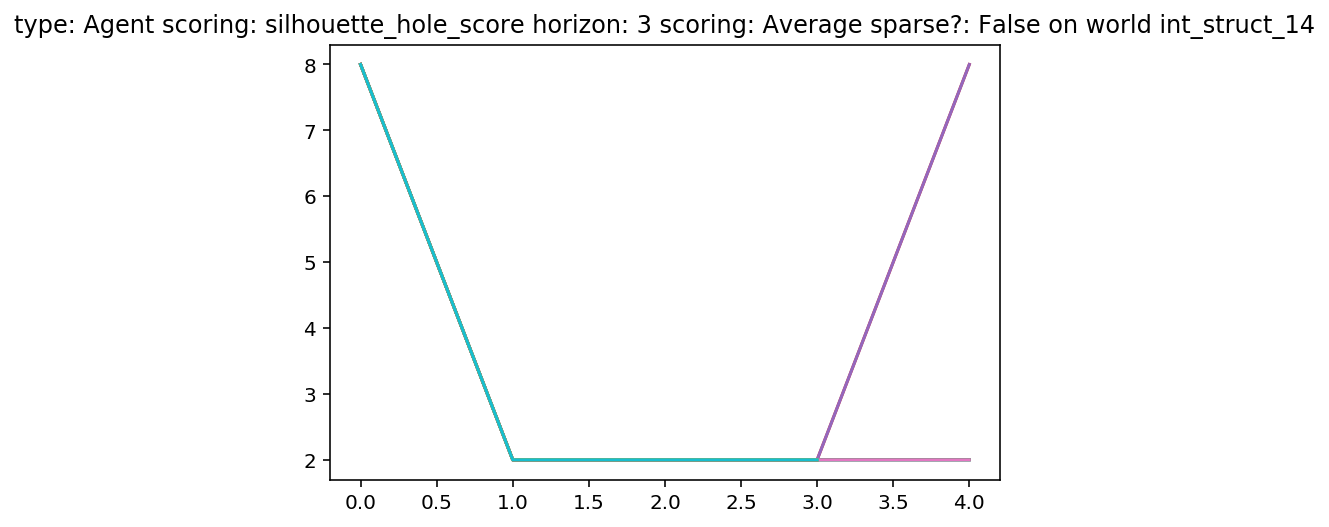

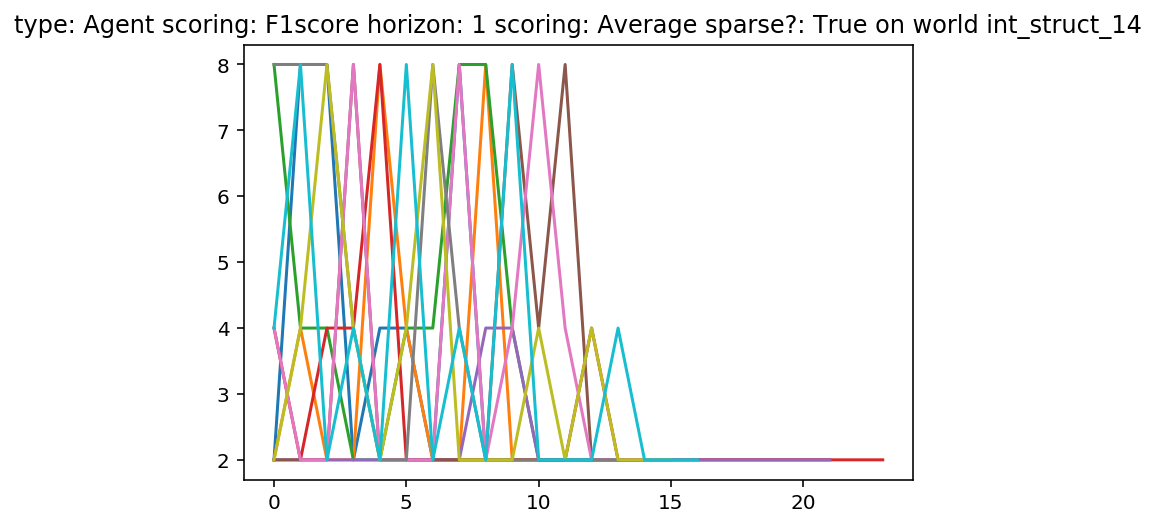

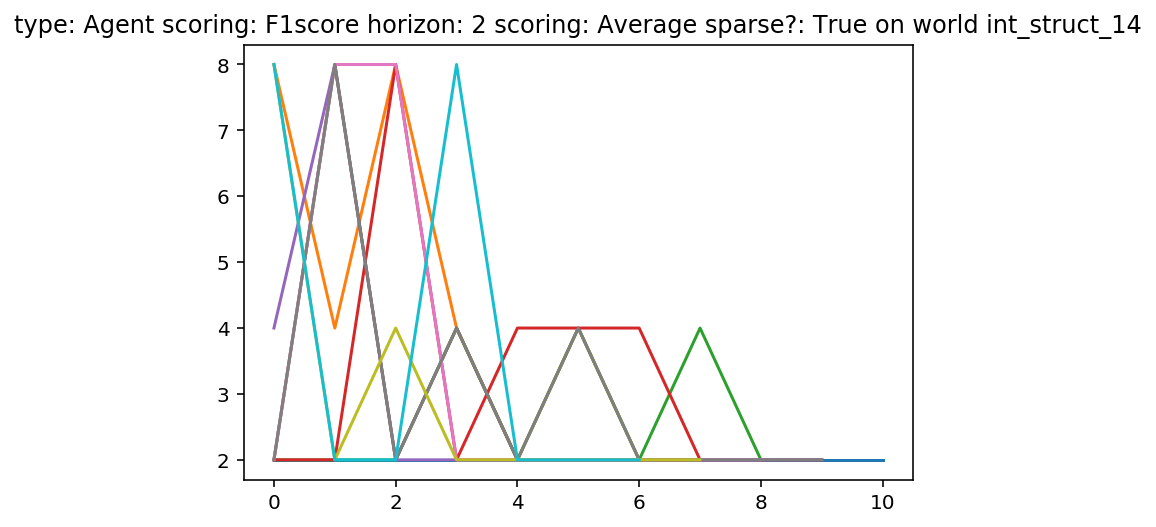

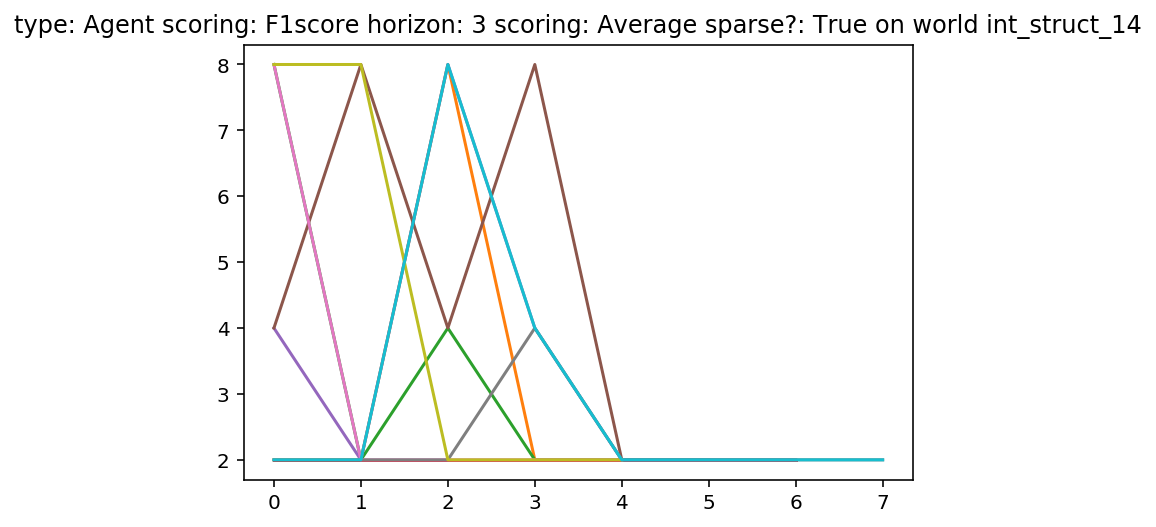

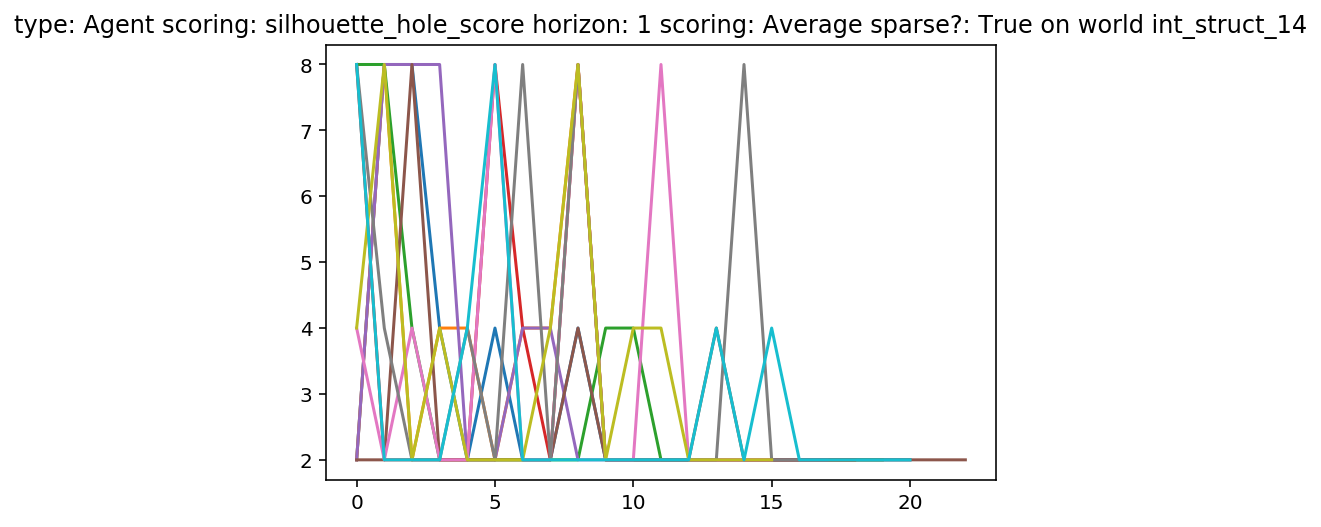

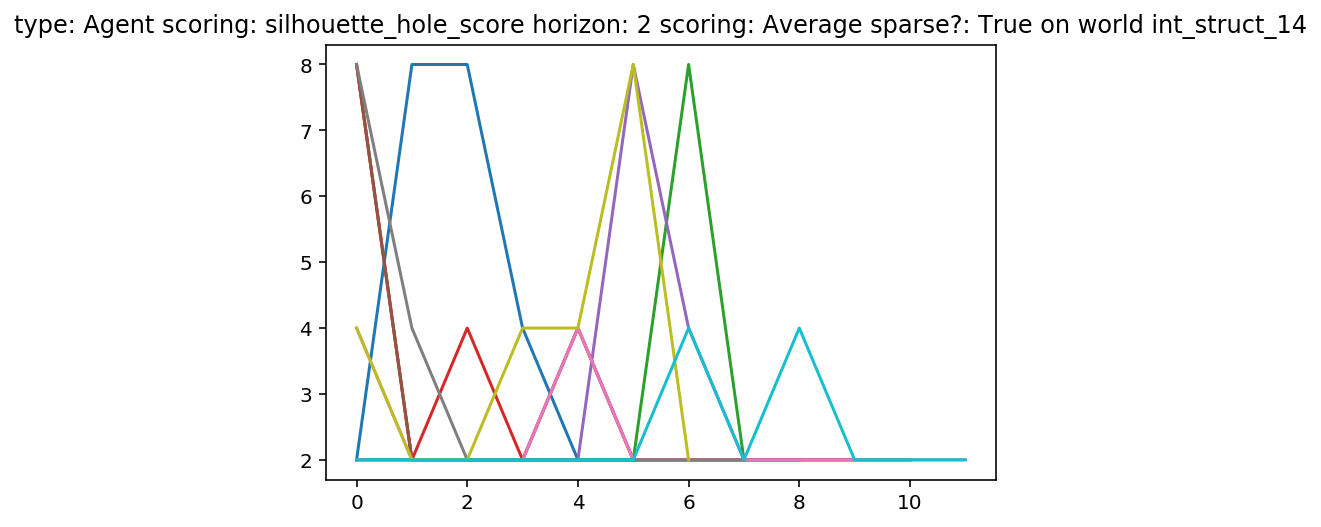

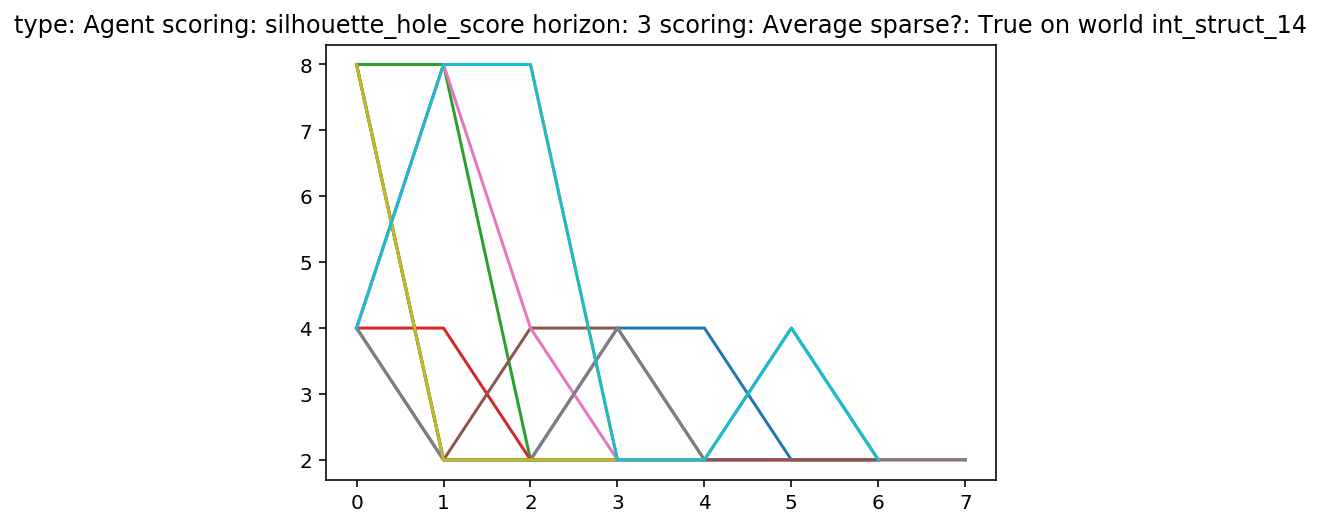

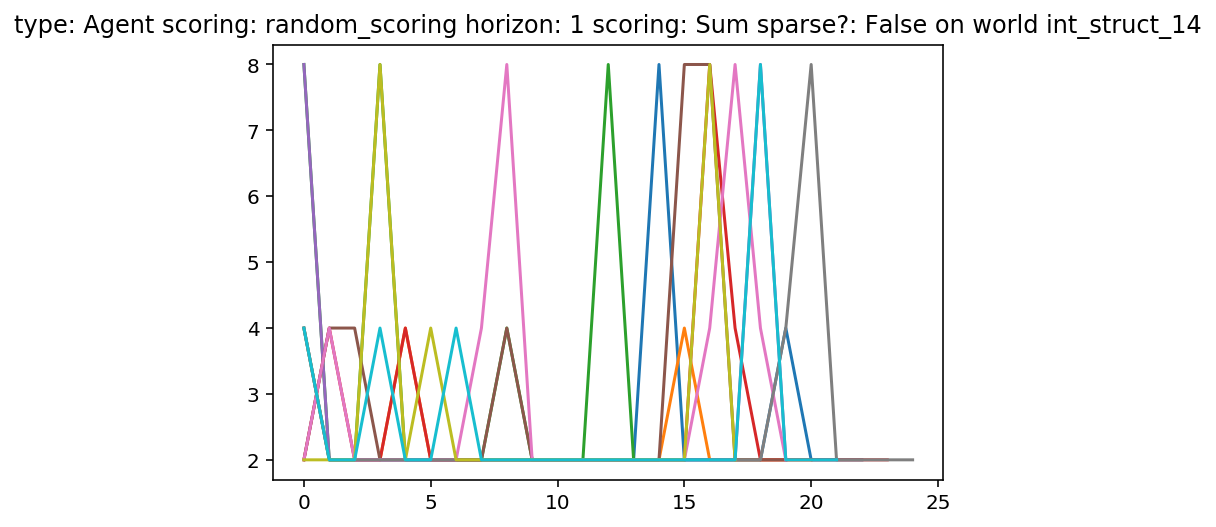

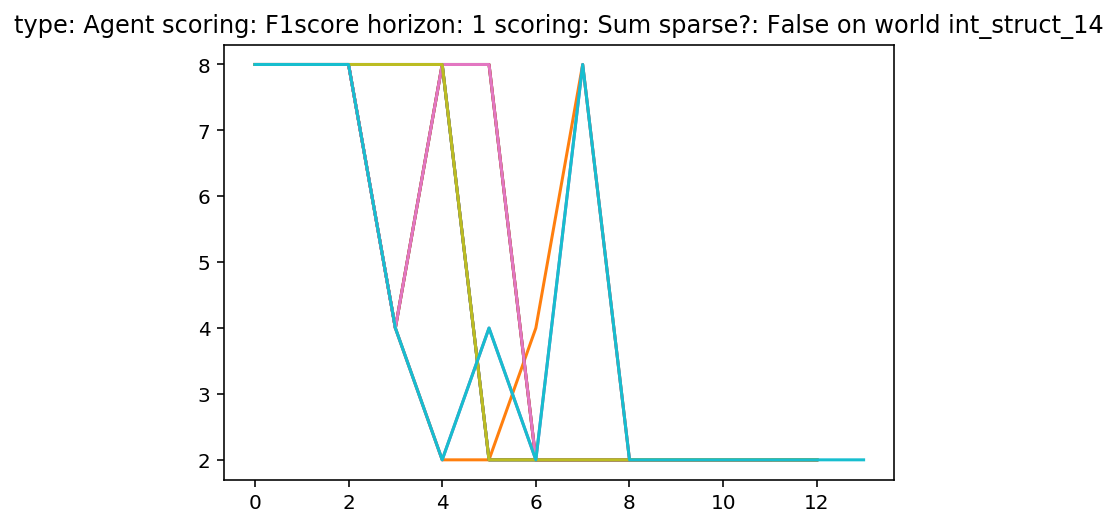

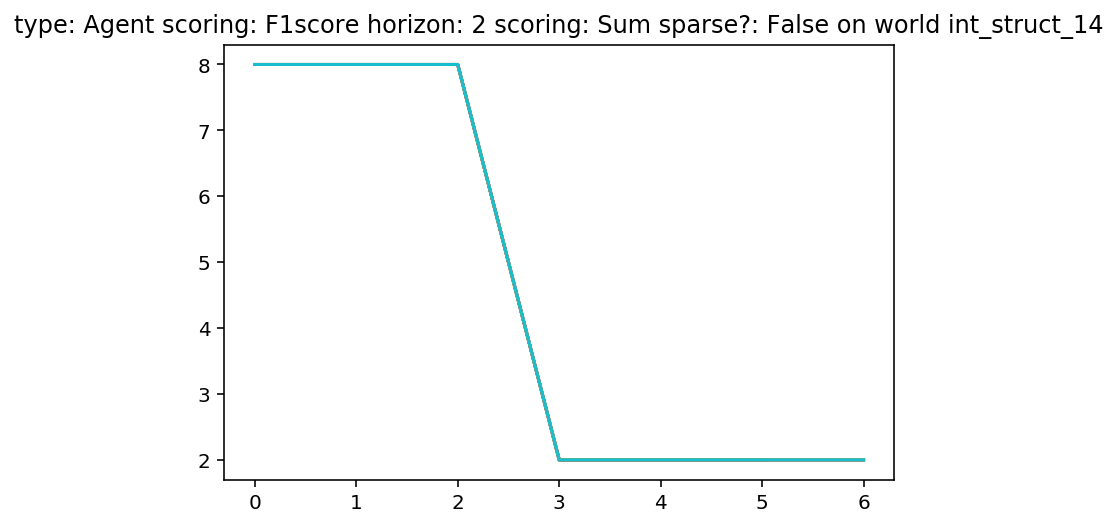

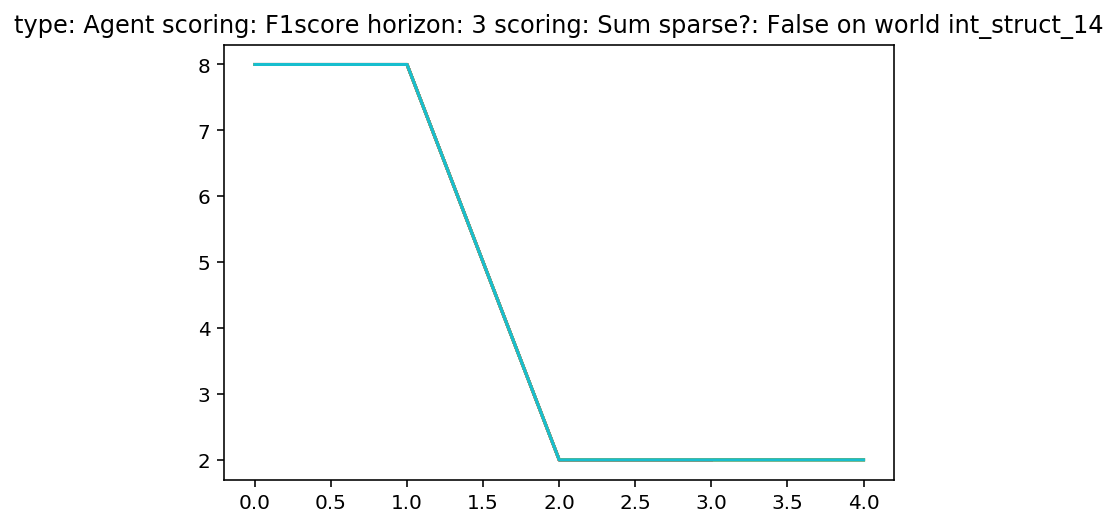

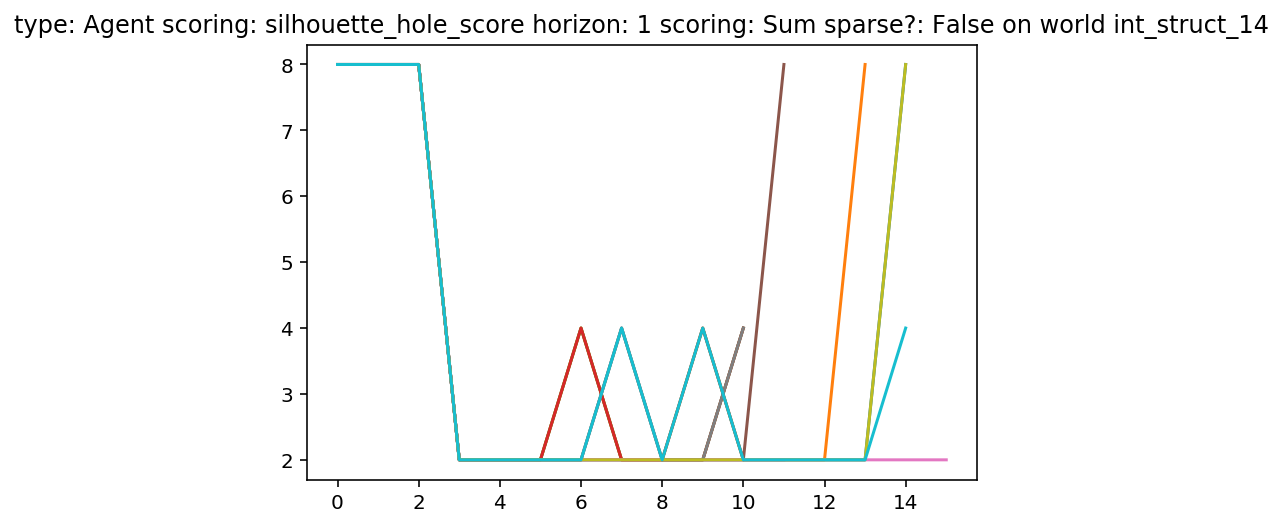

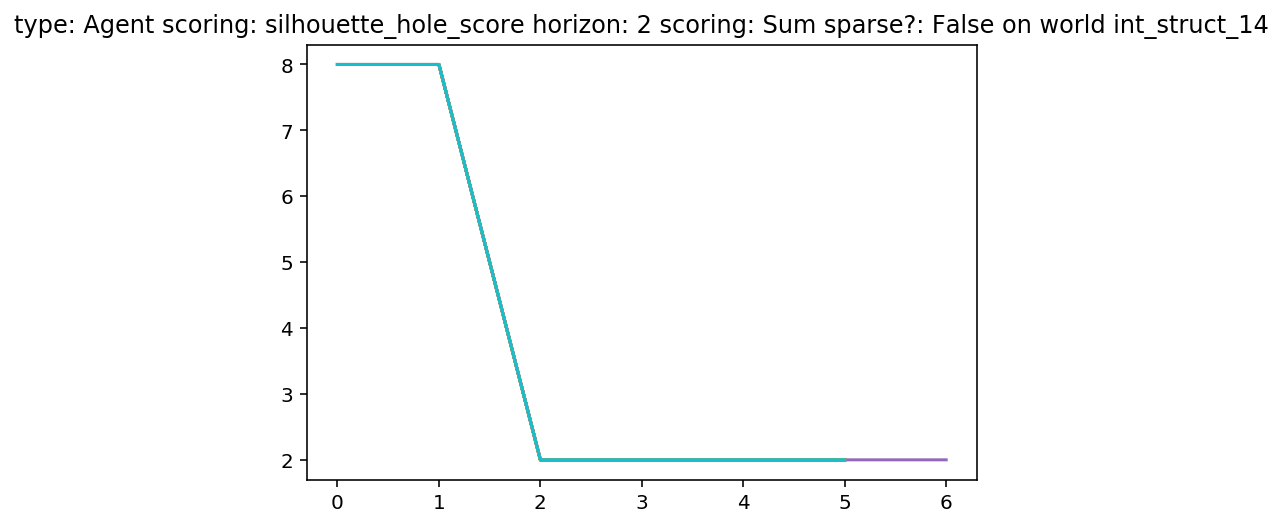

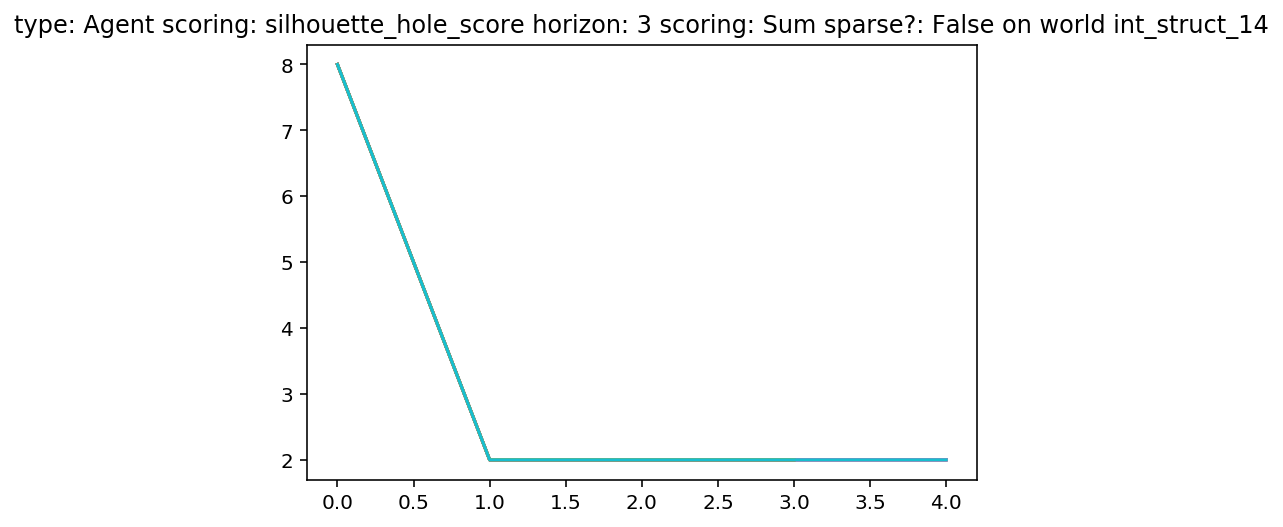

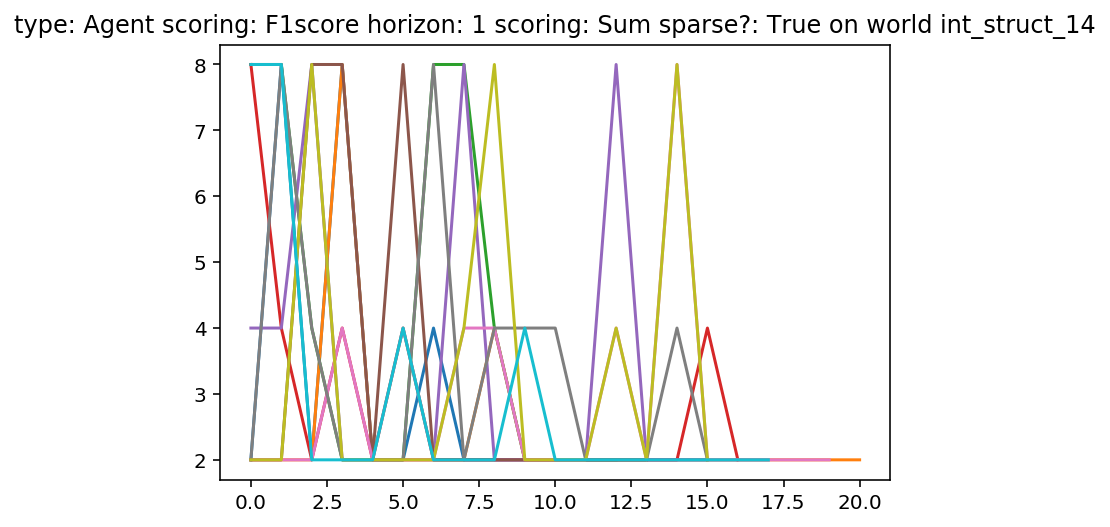

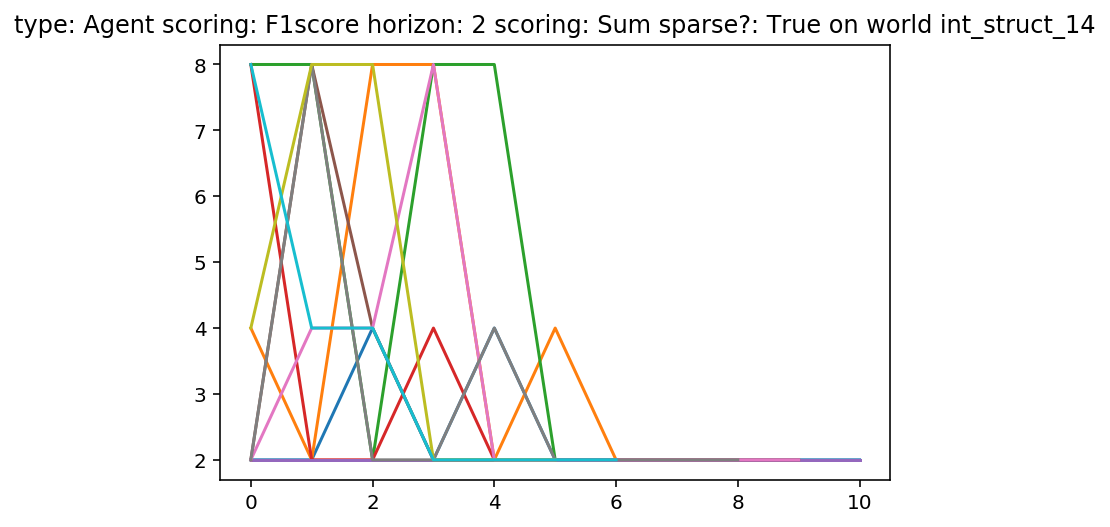

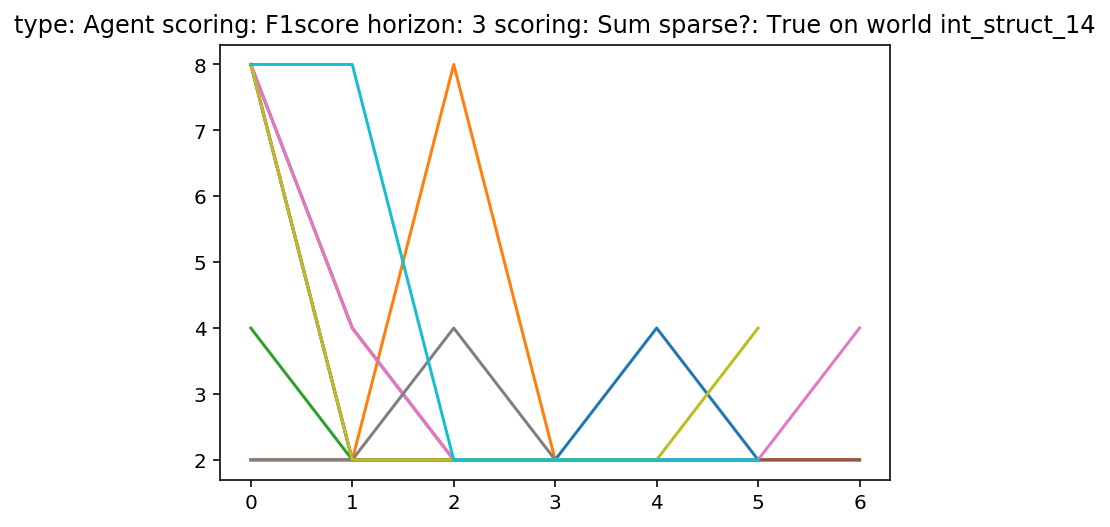

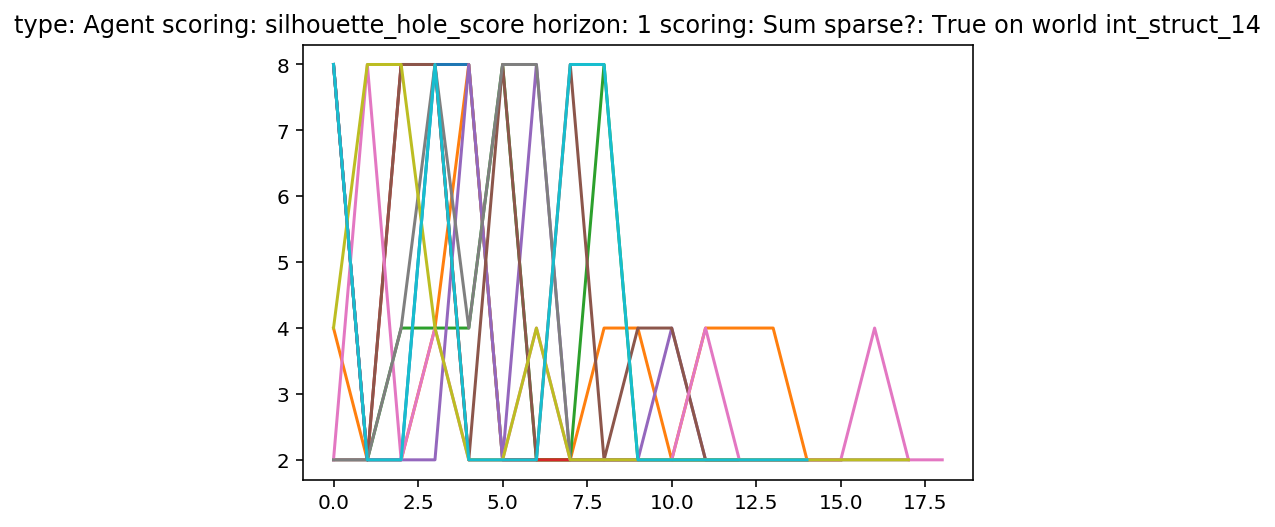

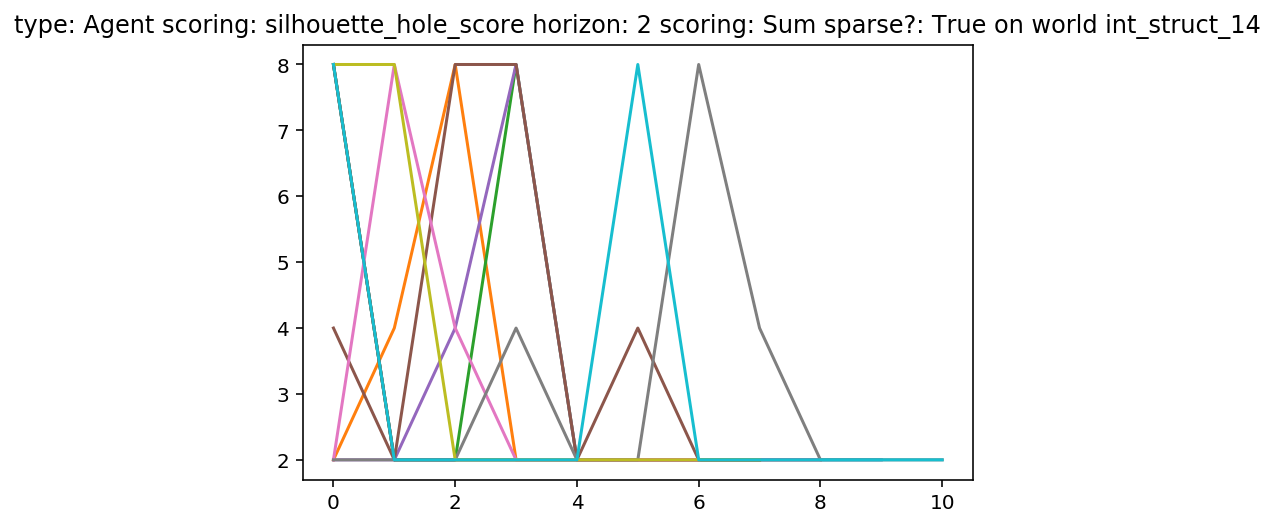

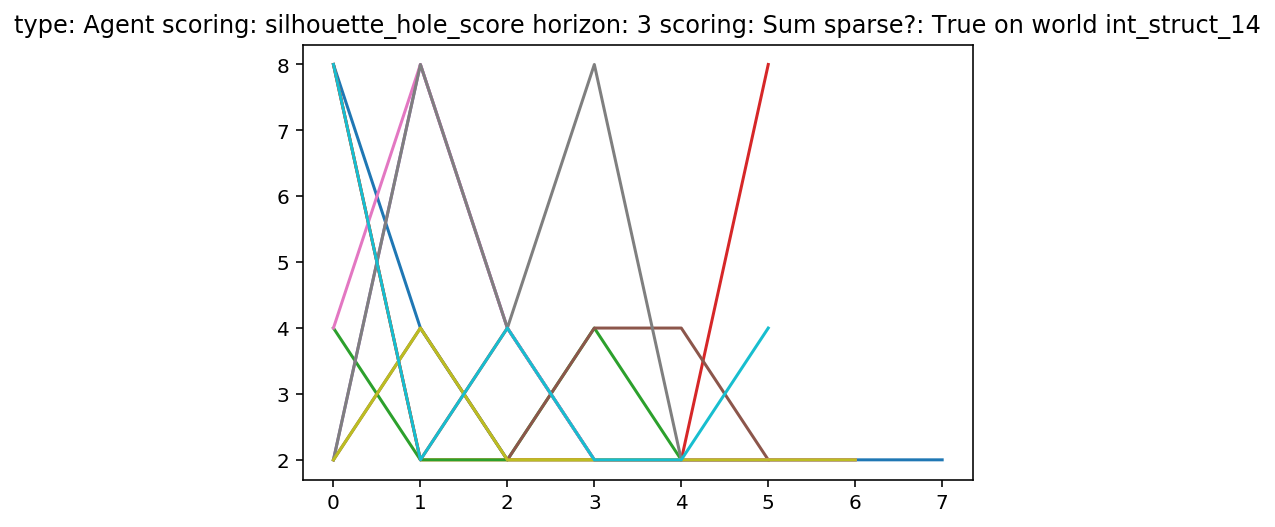

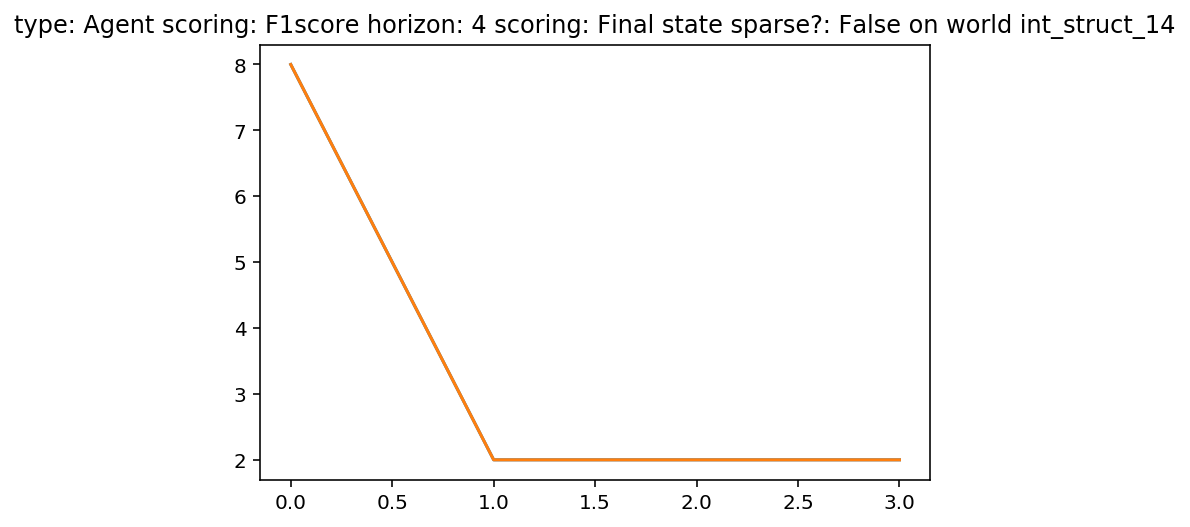

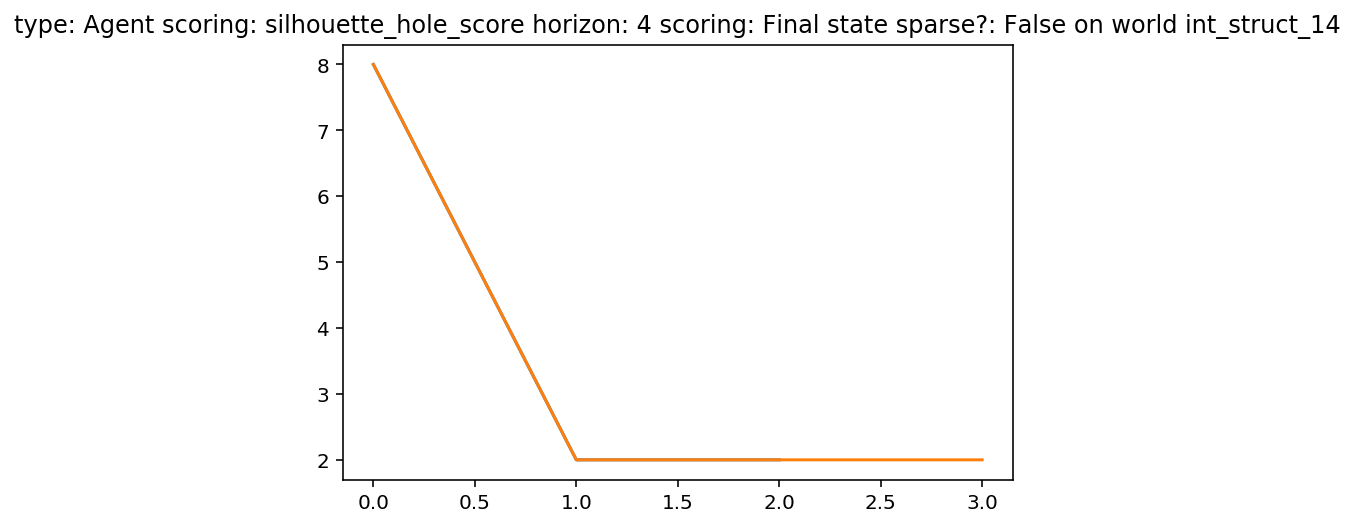

IndexError: list index out of range

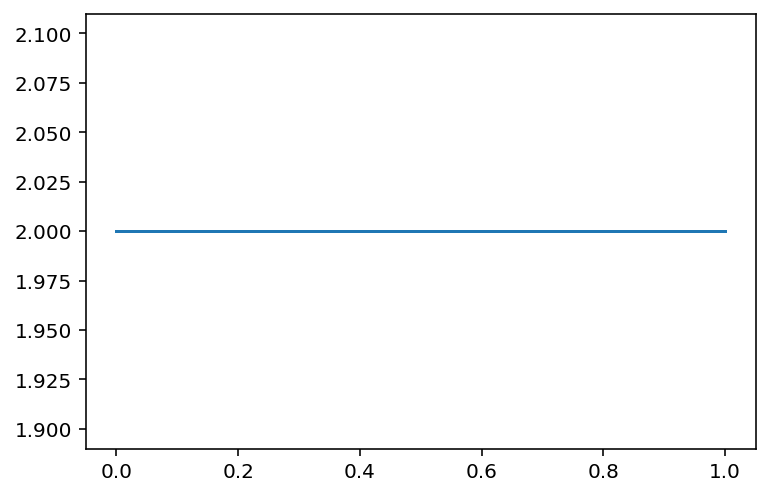

In [20]:
#block size over worlds and agents
#crashes, but it's not important anyway
for world in worlds_index:
    dfw = df[df['world'].str.contains(world)]
    for agent in agents:
        plt.clf() #clear the plot
        for run in dfw[dfw['agent']==agent]['run']:
            blocks_obj = run[run.notnull()['chosen action']]['chosen action'].to_list()
            size = [float(a)*float(b) for a,b in [b[0][0][1:-1].split('x') for b in blocks_obj]]
            plt.plot(size)
        plt.title(agent+' on world '+world)
        plt.show()

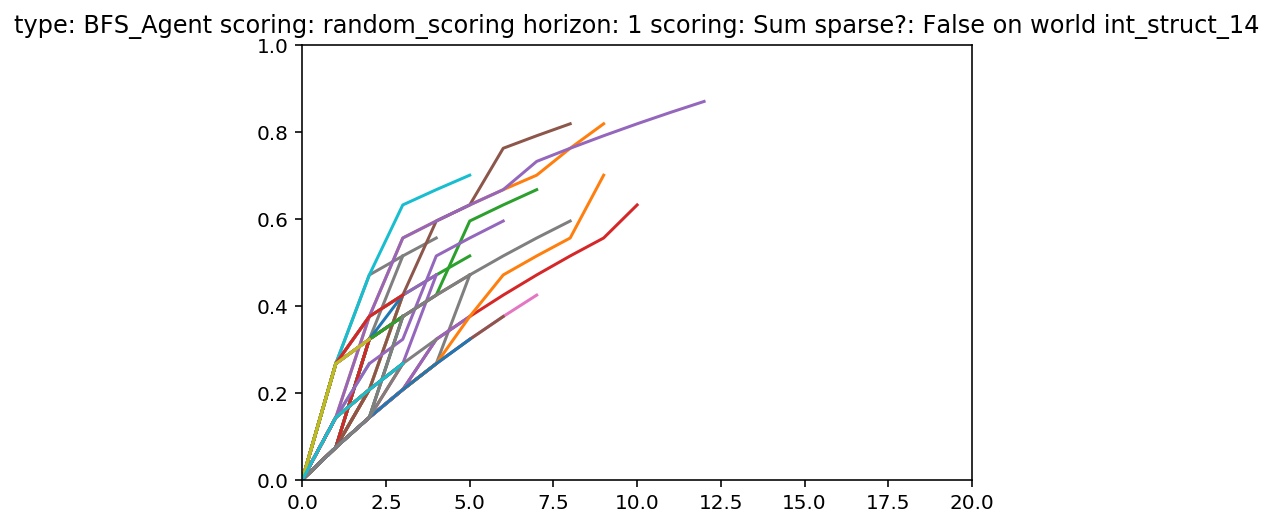

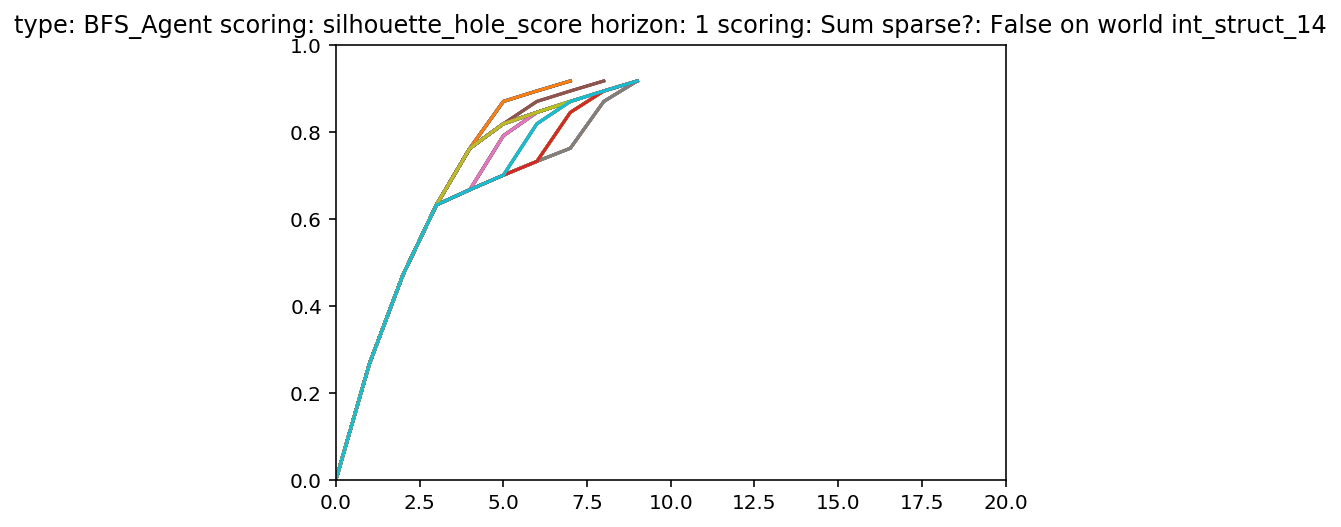

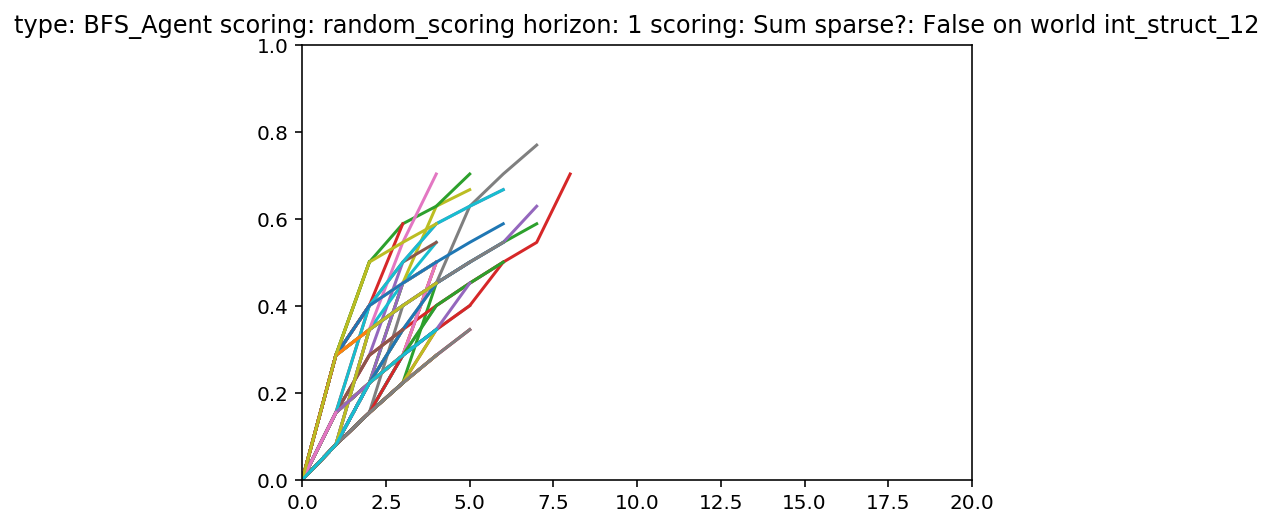

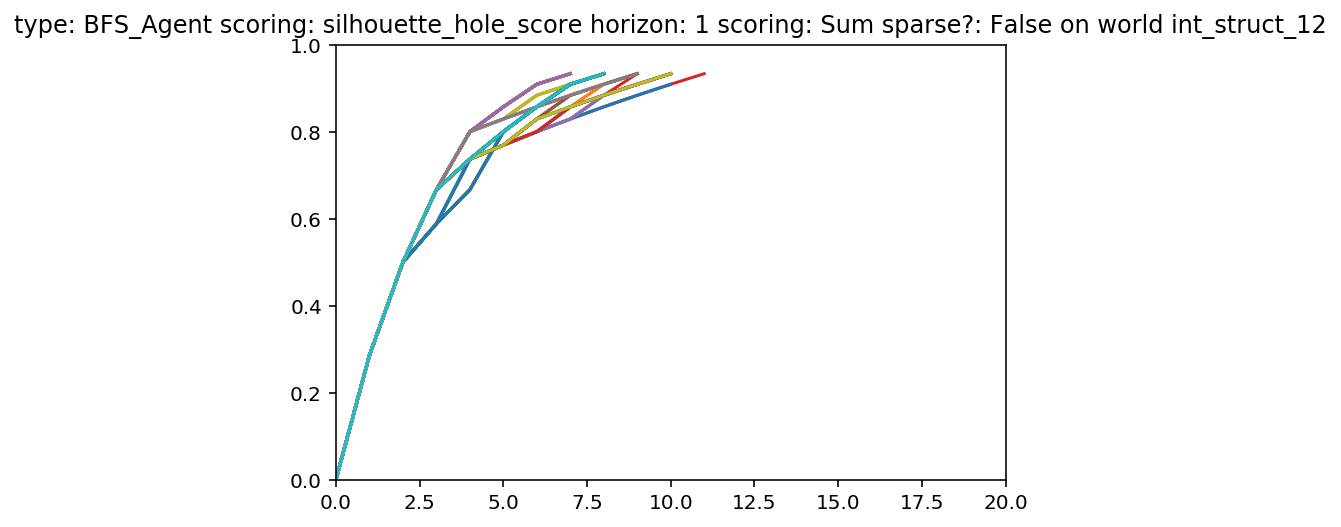

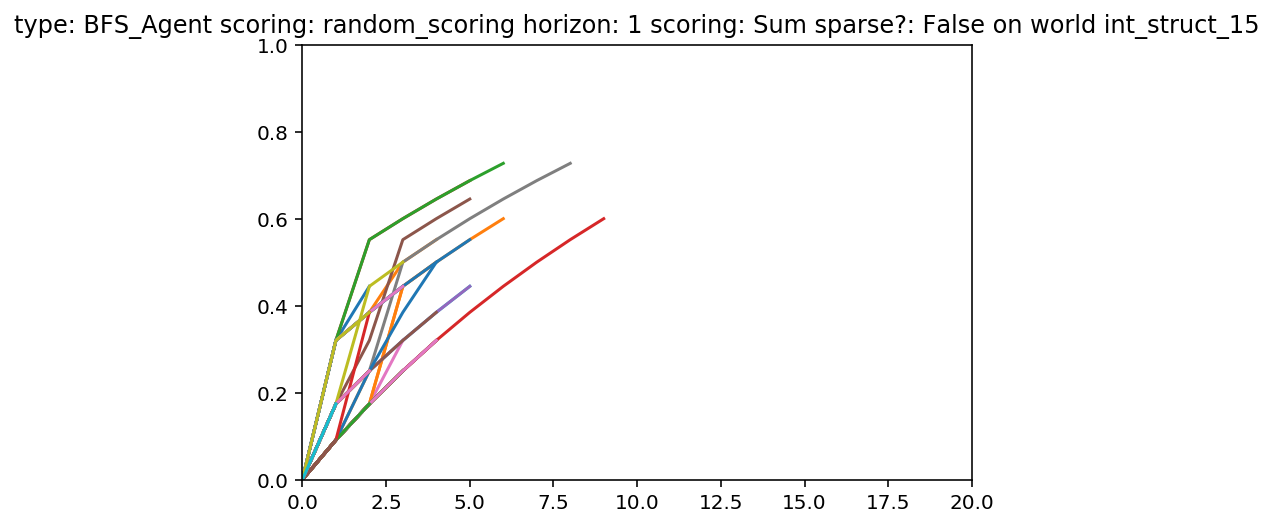

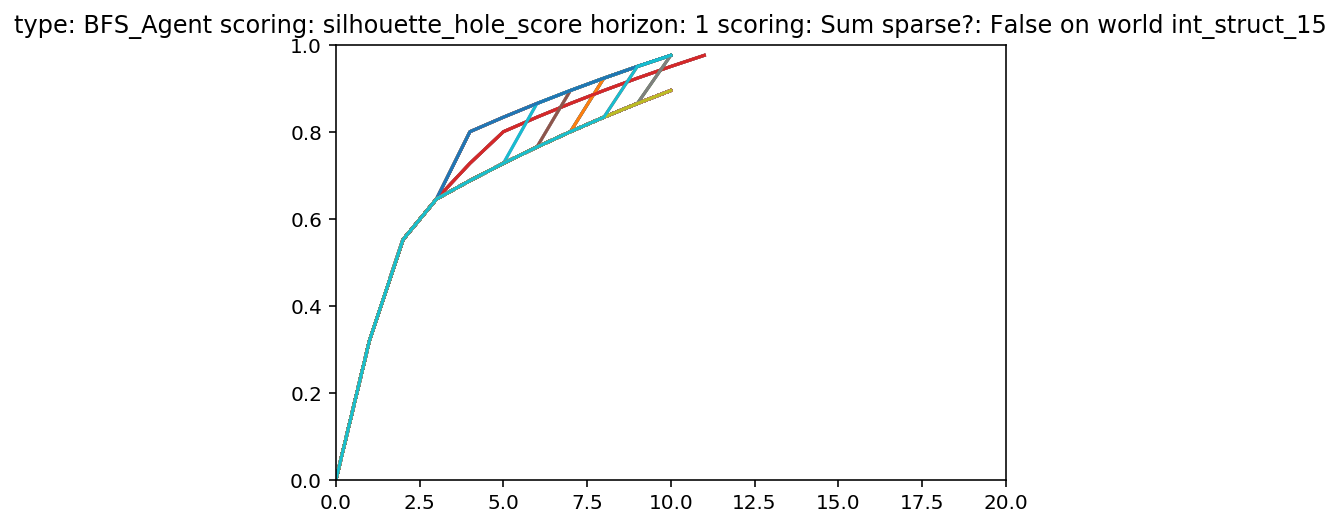

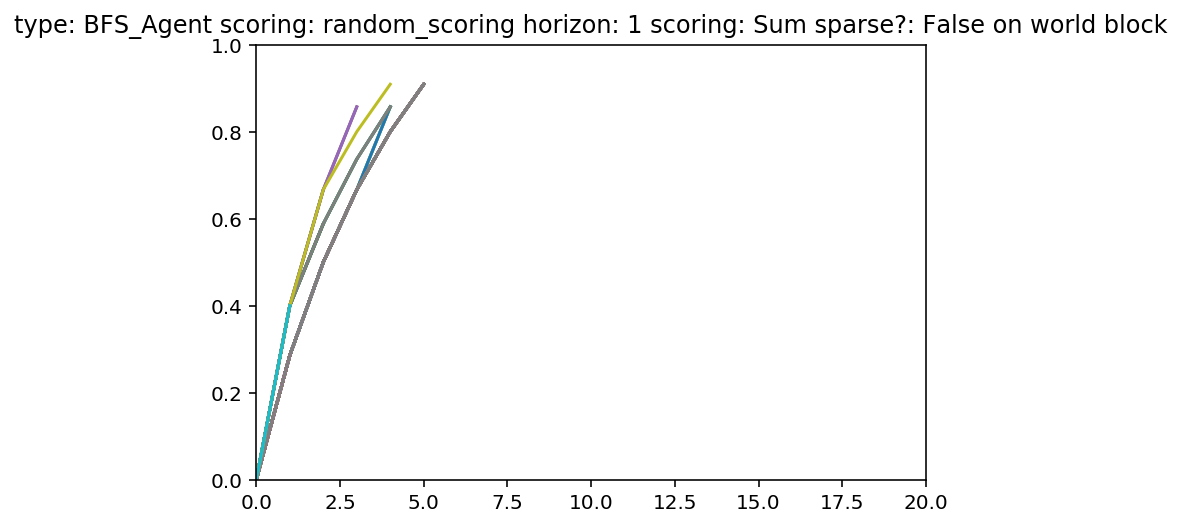

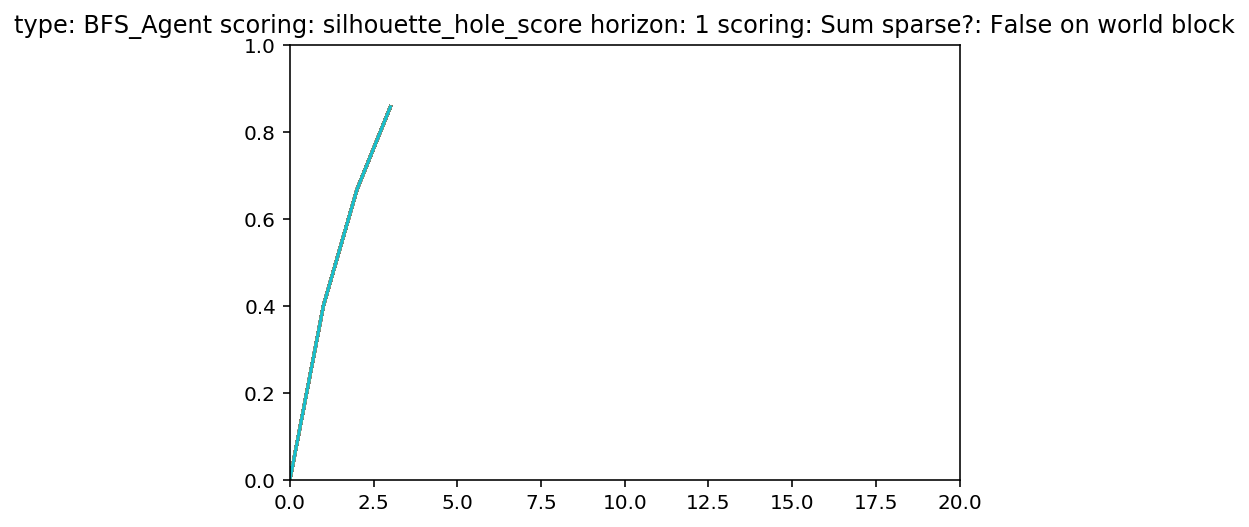

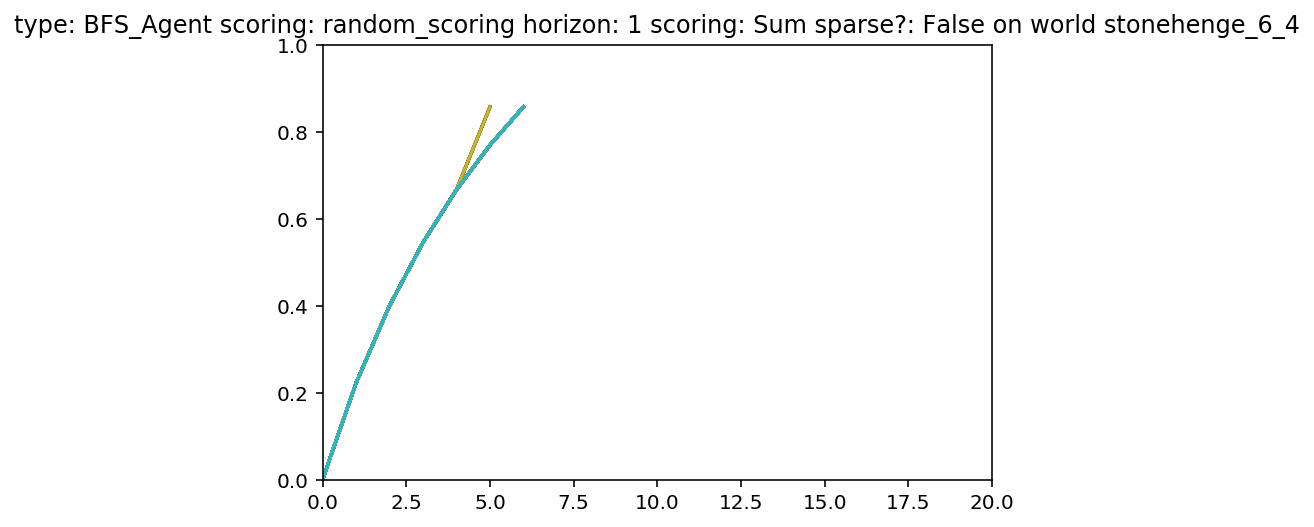

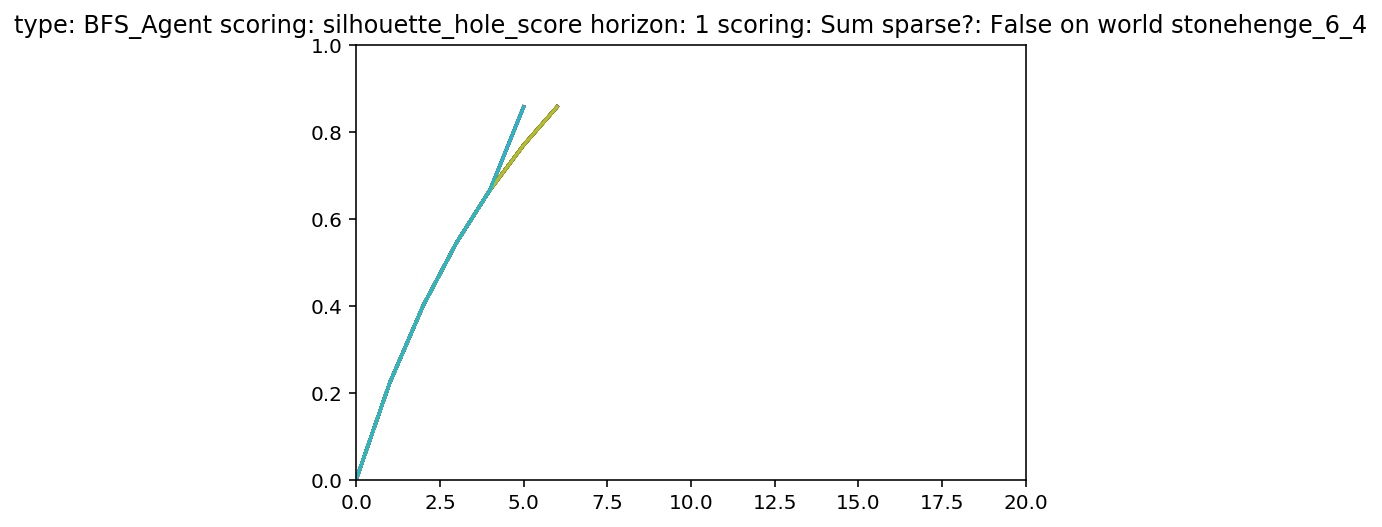

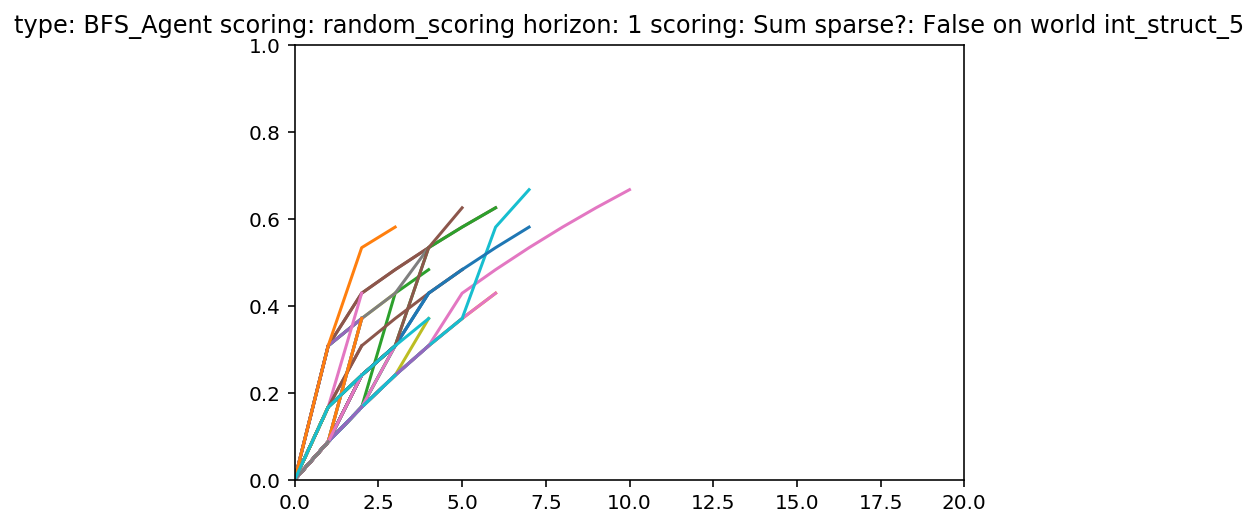

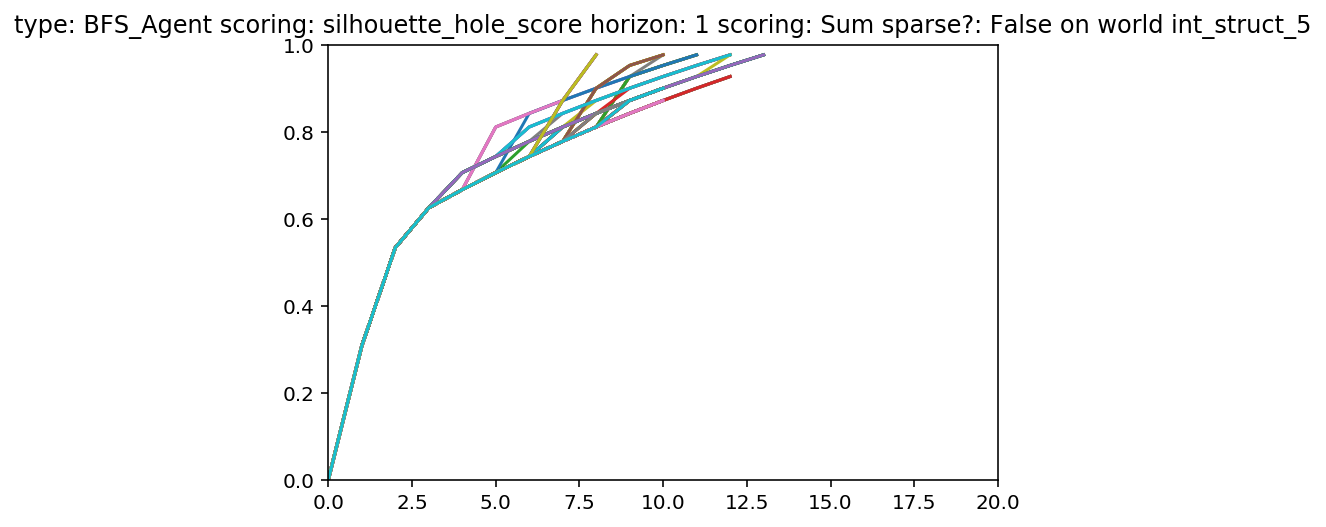

ValueError: operands could not be broadcast together with shapes (8,8) (4,4) 

<Figure size 432x288 with 0 Axes>

In [92]:
#over worlds and agents: F1 score
for world in worlds_index:
    dfw = df[df['world'].str.contains(world)]
    bw_world = bw_worlds[world.split('|')[0]]
    for agent in agents:
        plt.clf() #clear the plot
        for run in dfw[dfw['agent']==agent]['run']:
            blocks_obj = run[run.notnull()['chosen action']]['chosen action'].to_list()
            bm_obj = run[run.notnull()['blockmap']]['blockmap'].tail(1)
            blockmap = np.array(bm_obj.to_list())[0,0,::] #convert object back to np and take the wrappers off
            scores = []
            for move in range(np.max(blockmap)): #for every move
                _bmm = blockmap * (blockmap <= move)
                _state = State(bw_world,_bmm)
                score = bw.F1score(_state)
                scores.append(score)
            plt.plot(scores)
        plt.title(agent+' on world '+world)
        plt.xlim([0,20])
        plt.ylim([0,1])
        plt.show()

In [ ]:
#over worlds and agents: precision score
for world in worlds:
    dfw = df[df['world']==world]
    bw_world = bw_worlds[world]
    for agent in agents:
        plt.clf() #clear the plot
        for run in dfw[dfw['agent']==agent]['run']:
            blocks_obj = run[run.notnull()['chosen action']]['chosen action'].to_list()
            bm_obj = run[run.notnull()['blockmap']]['blockmap'].tail(1)
            blockmap = np.array(bm_obj.to_list())[0,0,::] #convert object back to np and take the wrappers off
            for move in range(np.max(blockmap)): #for every move
                _bmm = blockmap * (blockmap <= move)
                _state = State(bw_worlds[world.split('|')[0]],_bmm)
                score = bw.precision(_state)
                scores.append(score)
            plt.plot(scores)
        plt.title(agent+' on world '+world)
        plt.show()

In [94]:
agents

array(['type: BFS_Agent scoring: random_scoring horizon: 1 scoring: Sum sparse?: False',
       'type: BFS_Agent scoring: silhouette_hole_score horizon: 1 scoring: Sum sparse?: False'],
      dtype=object)

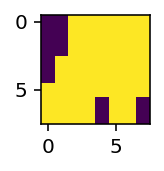

type: BFS_Agent scoring: random_scoring horizon: 1 scoring: Sum sparse?: False : 0 / 100 -> 0.0 %
type: BFS_Agent scoring: silhouette_hole_score horizon: 1 scoring: Sum sparse?: False : 0 / 100 -> 0.0 %




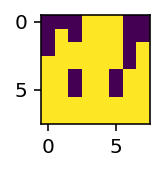

type: BFS_Agent scoring: random_scoring horizon: 1 scoring: Sum sparse?: False : 0 / 100 -> 0.0 %
type: BFS_Agent scoring: silhouette_hole_score horizon: 1 scoring: Sum sparse?: False : 0 / 100 -> 0.0 %




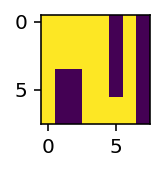

type: BFS_Agent scoring: random_scoring horizon: 1 scoring: Sum sparse?: False : 0 / 100 -> 0.0 %
type: BFS_Agent scoring: silhouette_hole_score horizon: 1 scoring: Sum sparse?: False : 34 / 100 -> 34.0 %




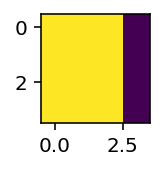

type: BFS_Agent scoring: random_scoring horizon: 1 scoring: Sum sparse?: False : 35 / 100 -> 35.0 %
type: BFS_Agent scoring: silhouette_hole_score horizon: 1 scoring: Sum sparse?: False : 100 / 100 -> 100.0 %




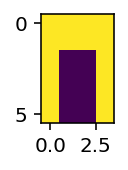

type: BFS_Agent scoring: random_scoring horizon: 1 scoring: Sum sparse?: False : 13 / 100 -> 13.0 %
type: BFS_Agent scoring: silhouette_hole_score horizon: 1 scoring: Sum sparse?: False : 38 / 100 -> 38.0 %




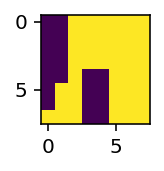

type: BFS_Agent scoring: random_scoring horizon: 1 scoring: Sum sparse?: False : 0 / 100 -> 0.0 %
type: BFS_Agent scoring: silhouette_hole_score horizon: 1 scoring: Sum sparse?: False : 0 / 100 -> 0.0 %




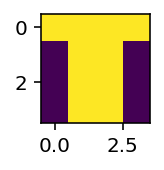

type: BFS_Agent scoring: random_scoring horizon: 1 scoring: Sum sparse?: False : 116 / 1100 -> 10.545454545454545 %
type: BFS_Agent scoring: silhouette_hole_score horizon: 1 scoring: Sum sparse?: False : 435 / 1100 -> 39.54545454545455 %




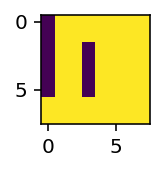

type: BFS_Agent scoring: random_scoring horizon: 1 scoring: Sum sparse?: False : 0 / 100 -> 0.0 %
type: BFS_Agent scoring: silhouette_hole_score horizon: 1 scoring: Sum sparse?: False : 63 / 100 -> 63.0 %




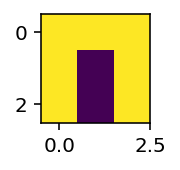

type: BFS_Agent scoring: random_scoring horizon: 1 scoring: Sum sparse?: False : 68 / 100 -> 68.0 %
type: BFS_Agent scoring: silhouette_hole_score horizon: 1 scoring: Sum sparse?: False : 100 / 100 -> 100.0 %




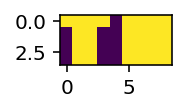

type: BFS_Agent scoring: random_scoring horizon: 1 scoring: Sum sparse?: False : 0 / 100 -> 0.0 %
type: BFS_Agent scoring: silhouette_hole_score horizon: 1 scoring: Sum sparse?: False : 100 / 100 -> 100.0 %




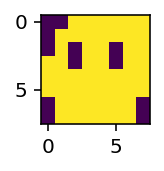

type: BFS_Agent scoring: random_scoring horizon: 1 scoring: Sum sparse?: False : 0 / 400 -> 0.0 %
type: BFS_Agent scoring: silhouette_hole_score horizon: 1 scoring: Sum sparse?: False : 34 / 400 -> 8.5 %




In [113]:
#win ratio for world & agent
for world in worlds_index:
    plt.figure(figsize=(1,1))
    plt.imshow(bw_worlds[world.split('|')[0]].silhouette)
    plt.show()
    for agent in agents:
        won = 0
        total = 0
        for index,outcome in df[(df['world'].str.contains(world)) & (df['agent'] == agent)][['outcome']].iterrows():
            if outcome[0] == 'Win': won += 1
            total += 1
        print(agent,':',won,'/',total,'->',(won/total)*100,'%')
    print('\n')

## Per horizon

In [1]:
#plot F1 over time for horizon
for horizon in ['1','2','3']:
    plt.clf() #clear the plot
    for row in df[df['agent'].str.contains("horizon: "+horizon)][['run','world']].iterrows():
        index, row = row
        run,world = row
        blocks_obj = run[run.notnull()['chosen action']]['chosen action'].to_list()
        bm_obj = run[run.notnull()['blockmap']]['blockmap'].tail(1)
        blockmap = np.array(bm_obj.to_list())[0,0,::] #convert object back to np and take the wrappers off
        scores =[]
        for move in range(np.max(blockmap)): #for every move
            _bmm = blockmap * (blockmap <= move)
            _state = State(bw_worlds[world.split('|')[0]],_bmm)
            score = bw.F1score(_state)
            scores.append(score)
        plt.plot(scores,linewidth=0.1)
    plt.title(horizon)
    plt.ylabel('F1 score')
    plt.xlabel('Step')
    plt.xlim(0,32)
    plt.show()

NameError: name 'plt' is not defined

In [ ]:
#images of worlds
for i,world in enumerate(bw_worlds.values()):
    plt.figure(figsize=(20,20))
    plt.subplot(3,4,i+1)
    plt.imshow(world.silhouette)
    plt.xticks([])
    plt.yticks([])
plt.show()

## Per chosen world
For comparisions between agents on a particular world. Most plots make the most sense here

In [280]:
chosen_world = elephant
# chosen_world = 'stonehenge_6_4'
chosen_world_obj = bw_worlds[chosen_world]
xlim = 20

In [360]:
#average number of steps per agent on chosen world for failure and success
for agent in agents:
    win_lengths = []
    failure_lengths = []
    for i,row in df[(df['agent']==agent) & (df['world'].str.contains(chosen_world))].iterrows():
        num_steps = len(get_blockmaps(row['run'])) # get number of steps
        if row['outcome'] == 'Win':
            win_lengths.append(num_steps)
        if row['outcome'] == 'Fail':
            failure_lengths.append(num_steps)
    print(agent)
    print(len(win_lengths),"wins with avg length",sum(win_lengths)/(len(win_lengths)+0.0001))
    print(len(failure_lengths),"failures with avg length",sum(failure_lengths)/(len(failure_lengths)+0.0001))
    print("\n")

type: BFS_Agent scoring: random_scoring horizon: 1 scoring: Sum sparse?: False
0 wins with avg length 0.0
100 failures with avg length 4.01999598000402


type: BFS_Agent scoring: silhouette_hole_score horizon: 1 scoring: Sum sparse?: False
34 wins with avg length 12.176434775191836
66 failures with avg length 11.999981818209365




### Over agents in one plot

In [345]:
#wins over agent for chosen world
for agent in agents:
    wins = 0
    total = 0
    for o in df[(df['agent']==agent) & (df['world'].str.contains(chosen_world))]['outcome']:
        if o == 'Win':
            wins+=1
        total += 1
    print(wins,'/',total,str(round(100*wins/total,2))+'%',agent)

0 / 100 0.0% type: BFS_Agent scoring: random_scoring horizon: 1 scoring: Sum sparse?: False
34 / 100 34.0% type: BFS_Agent scoring: silhouette_hole_score horizon: 1 scoring: Sum sparse?: False


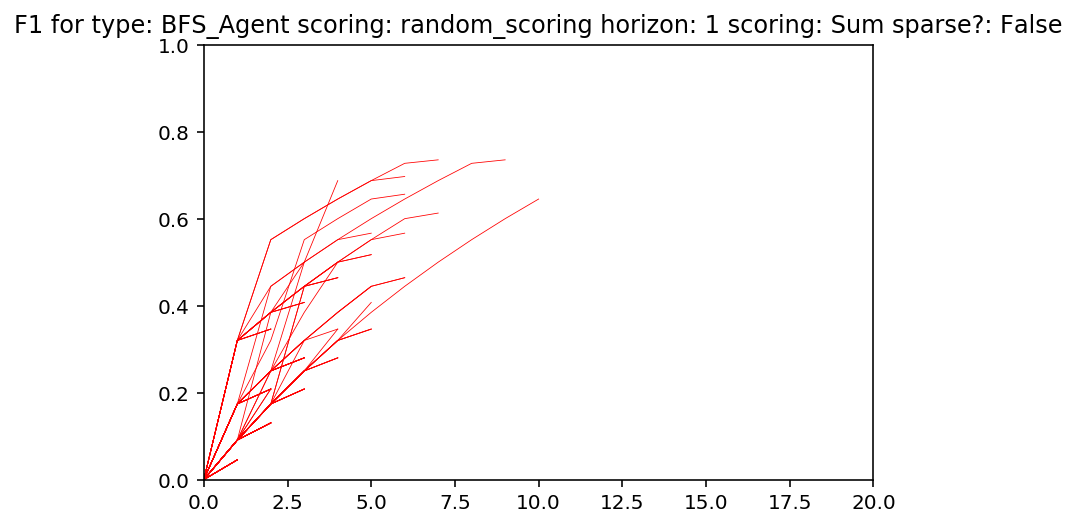

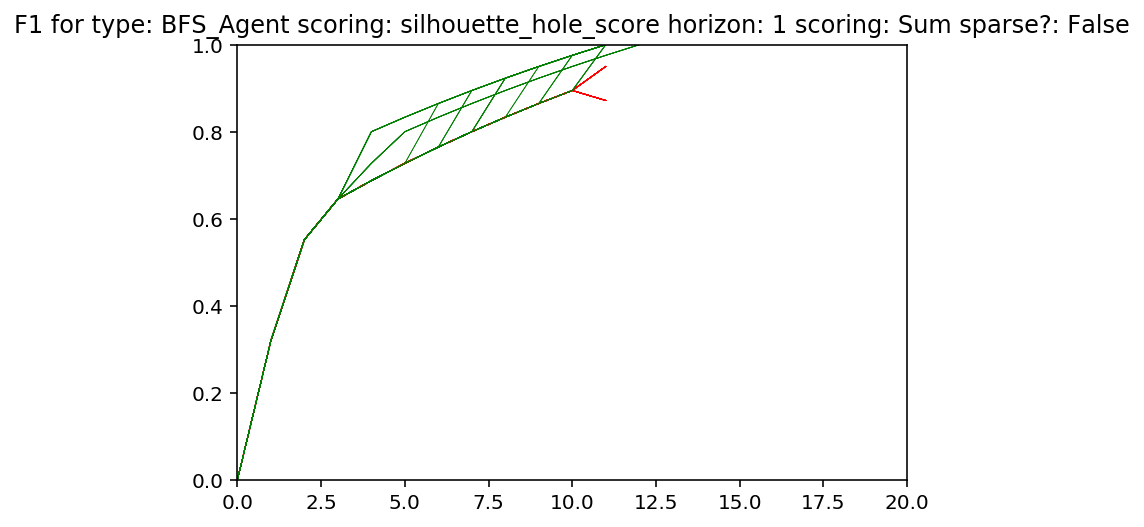

In [323]:
#plot all F1 over time for chosen world and over agents colored by success
runs = get_BFS_runs(_world_indexes=[chosen_world]) #get runs
_agents = runs['agent'].unique() #get agents
for _agent in _agents: #plot per agent
    a_runs = runs[runs['agent'] == _agent]
    for i,row in a_runs.iterrows(): #for each run of the agent
        blockmaps = get_blockmaps(row['run']) #get sequence of blockmaps
        fin_status,fin_reason = get_final_status(row['run'])
        #calculate the score for each blockmap
        scores = []
        for bm in blockmaps:
            #make a State to score
            state = State(chosen_world_obj,bm)
            score = bw.F1score(state)
            scores.append(score)
        #plot
        plt.plot(scores,linewidth=0.3,c='green' if fin_status == 'Win' else 'red')
        plt.xlim(0,xlim)
        plt.ylim(0,1)
    plt.title('F1 for '+_agent)
    plt.show()
        

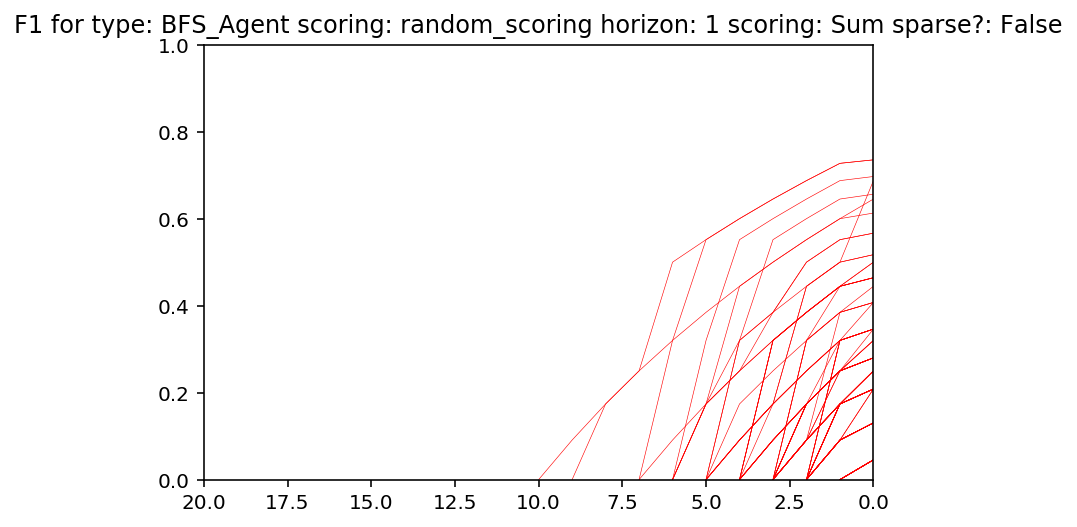

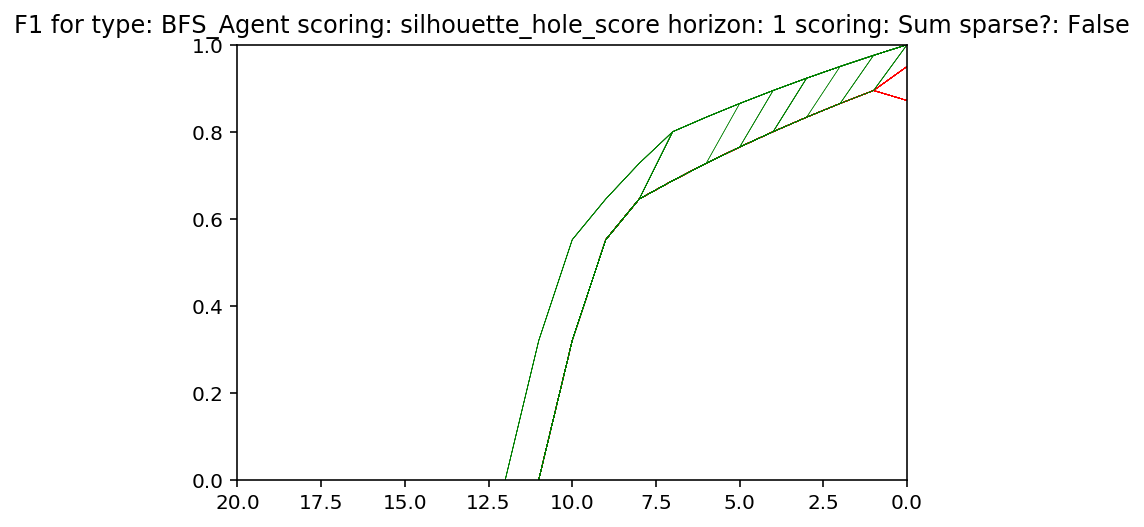

In [330]:
#plot all F1 over time for chosen world and over agents—endaligned
runs = get_BFS_runs(_world_indexes=[chosen_world]) #get runs
_agents = runs['agent'].unique() #get agents
for _agent in _agents: #plot per agent
    a_runs = runs[runs['agent'] == _agent]
    for i,row in a_runs.iterrows(): #for each run of the agent
        blockmaps = get_blockmaps(row['run']) #get sequence of blockmaps
        fin_status,fin_reason = get_final_status(row['run'])
        #calculate the score for each blockmap
        scores = []
        for bm in blockmaps:
            #make a State to score
            state = State(chosen_world_obj,bm)
            score = bw.F1score(state)
            scores.append(score)
        #plot
        plt.plot(scores[::-1],linewidth=0.3,c='green' if fin_status == 'Win' else 'red')
        plt.xlim(xlim,0)
        plt.ylim(0,1)
    plt.title('F1 for '+_agent)
    plt.show()
        

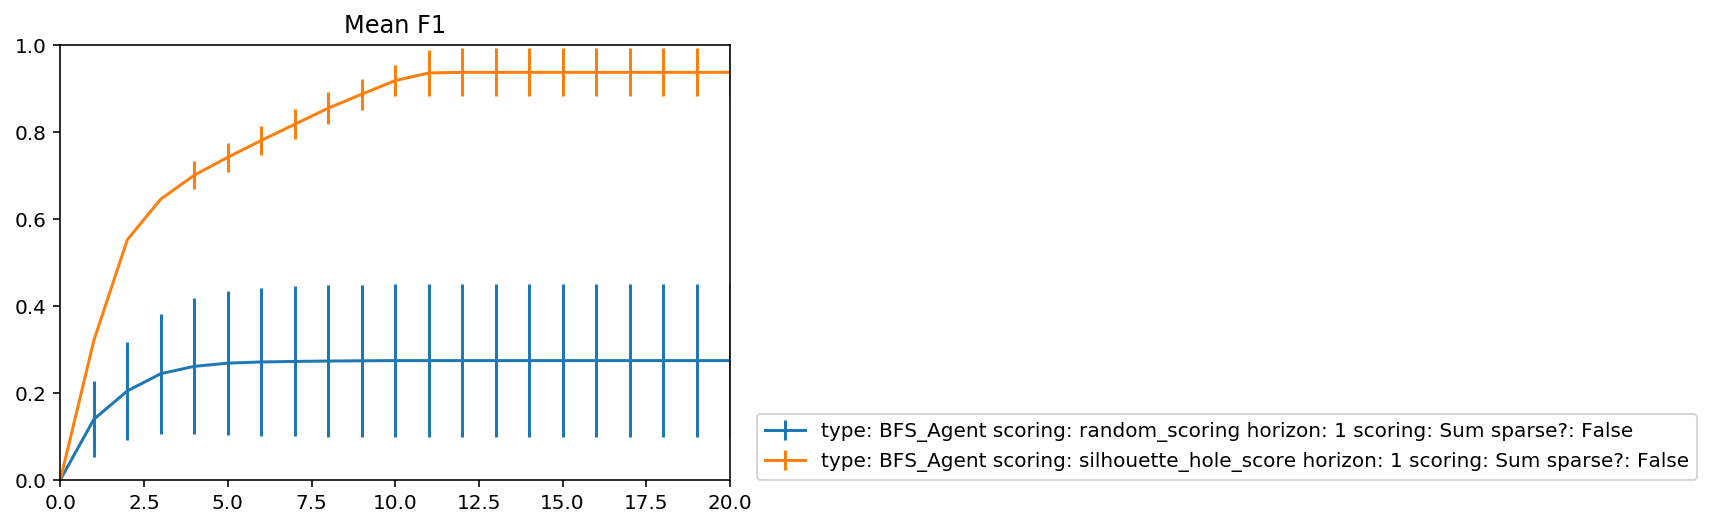

In [340]:
#plot mean F1,std over time for chosen world and over agents in one plot (with continuation)
#change scoring function to precision, recall,...
runs = get_BFS_runs(_world_indexes=[chosen_world]) #get runs
_agents = runs['agent'].unique() #get agents
for _agent in _agents: #plot per agent
    a_runs = runs[runs['agent'] == _agent]
    run_scores = []
    for i,row in a_runs.iterrows(): #for each run of the agent
        blockmaps = get_blockmaps(row['run']) #get sequence of blockmaps
        #calculate the score for each blockmap
        scores = []
        for bm in blockmaps:
            #make a State to score
            state = State(chosen_world_obj,bm)
            score = bw.F1score(state)
            scores.append(score)
        #append (pad) score with last value to xlim as a way of handling the early termination of trials
        scores = [scores[i] if i < len(scores) else scores[-1] for i in range(xlim+1)]
        run_scores.append(scores)
    #avg,std
    avgs = np.mean(run_scores,axis=0)
    stds = np.std(run_scores,axis=0)
    #plot
#     plt.plot(range(len(avgs)),avgs)
    plt.errorbar(range(len(avgs)),avgs,stds,label=_agent)
    plt.xlim(0,xlim)
    plt.ylim(0,1)
plt.title('Mean F1')
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)
plt.show()
        

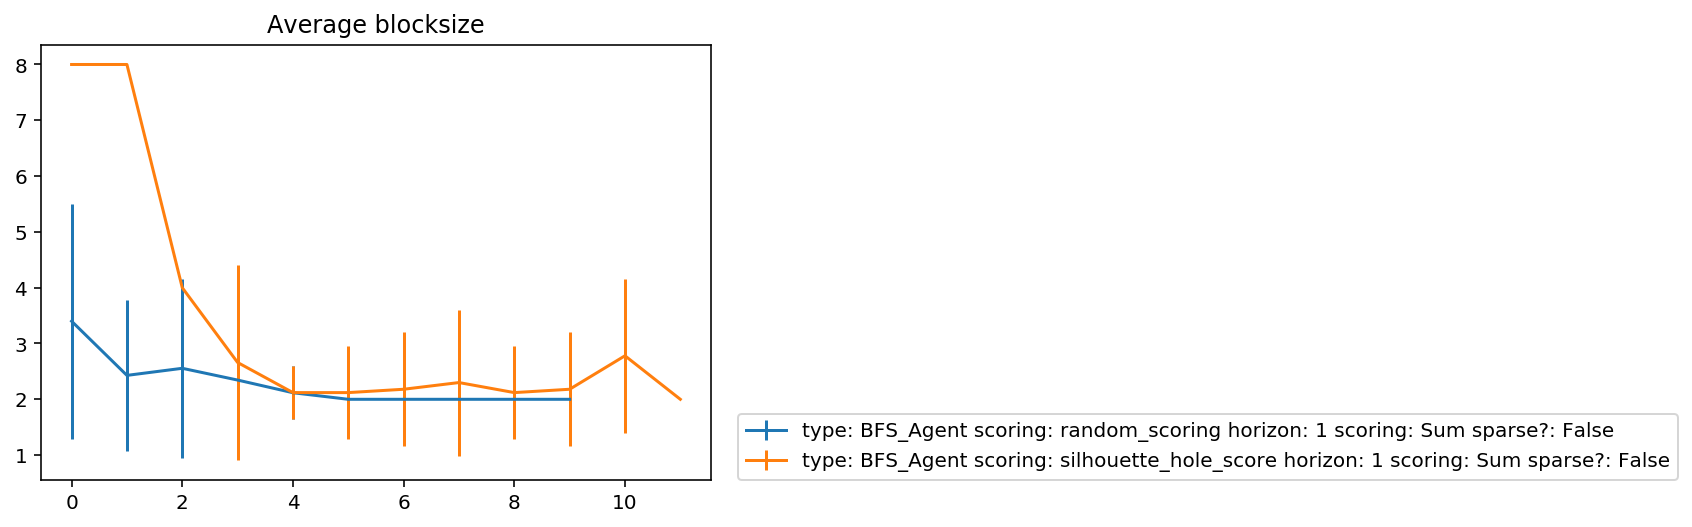

In [397]:
#plot avg blocksize over time for agent in chosen world
#mind that most of the later ones are NaNs!
for agent in agents:
    sizes_runs = []
    for run in df[(df['agent']==agent) & df['world'].str.contains(chosen_world)]['run']:
        blocks_obj = run[run.notnull()['chosen action']]['chosen action'].to_list()
        sizes_run = [float(a)*float(b) for a,b in [b[0][0][1:-1].split('x') for b in blocks_obj]]
        sizes_runs.append(sizes_run)
    len_seq = max([len(s) for s in sizes_runs]) #length of the longest sequence
    runs_arr = np.full([len(sizes_runs),len_seq],np.nan)
    #fill the array
    for i,sizes_run in enumerate(sizes_runs):
        runs_arr[i,0:len(sizes_run)] = sizes_run
    #get stats
    means = np.nanmean(runs_arr,axis=0)
    stds = np.nanstd(runs_arr,axis=0)
    plt.errorbar(range(len(means)),means,stds,label=agent)
plt.title("Average blocksize")
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)
plt.show()